# Notebook del pronóstico de precios de productos agrícolas en Santander

Para el desarrollo del proyecto denominado "Métodos de predicción de precios para los productos agrícolas en Santander, mediante técnicas de aprendizaje automático" se realiza el presente repositorio en el cual se encuentran los códigos realizados dentro del proyecto. El repositorio consta de cuatro carpetas las cuales contienen el análisis de los datos antes del procesamiento, el primer modelo ARIMA-RNA (Híbrido), el segundo modelo RNA-Backpropagation, y el tercer modelo ANFIS. Los modelos se desarrollan a partir del análisis de los precios históricos de venta por kilogramo a cada producto (y por día de forma individual) en la central de abastos de Bucaramanga. La base de datos es recolectada entre los periodos 12 de junio del año 2012 y 30 de abril del año 2018. El repositorio permite dar cumplimiento a las actividades del segundo objetivo del proyecto y por consecuencia al mismo (Seleccionar diversos modelos de predicción de precios basados en máquinas de aprendizaje automático para cada uno de los productos seleccionados).

Autores:

Juan David Márquez González

Laura Vanessa Montaño Perez

Leonardo Hernán Talero Sarmiento

# 1. Análisis de datos 

En esta sección se presentan la base de datos, limpieza, imputación y análisis de los mismos. Para el desarrollo de lo anterior se hace necesario la instalación de los siguientes paquetes de R; la primera función que aparece a continuación se utiliza para suprimir los mensajes "warning" generados por el programa.

In [1]:
options(warm=-1)  # no mostrar mensajes de alerta

In [4]:
library(ggplot2)  # libreria para gráficar
#library(readr)   # libreria para leer 
library(readxl)   # libreria para leer datos de excel
library(naniar)   # libreria para visualizar datos faltantes 
library(forecast) # libreria para imputación
library(imputeTS) # libreria para imputación
library(corrplot) # libreria para el gráfico de correlación
library(urca)     # libreria para aplicar pruebas de raíz unitarias
library(lmtest)   # libreria para aplicar prueba Durbin-Watson
library(randtests)# libreria para aplicar prueba bartel

## 1.1 Generación y descripción de la base de datos

In [5]:
Datos= read_excel("Datos de Precios.xlsx")
#Datos de Precios- Base de datos obtenida a traves del sistema de informacion de precios y abastecimiento del sector agropecuario - SIPSA
#url- https://www.dane.gov.co/index.php/estadisticas-por-tema/agropecuario/sistema-de-informacion-de-precios-sipsa/mayoristas-boletin-semanal-1
#base de datos alimentada con los datos de precios del 12/06/2012 hasta 30/04/2018.

In [6]:
DATA<-data.frame(Datos)

DATA es la base de datos que es convertida en frame para ser utilizada en el procesamiento. En esta base de datos se puede observar que los precios están distribuidos entre los 7 días de la semana.

In [7]:
#Descripción de la base de datos generada
print("Primeros 5 precios de la base de datos")
head(Datos[,1:length(DATA)])

print("Características de los datos")
print(str(DATA[,2:length(DATA)]))

print("Resumen descriptivo de los primeros datos")
summary(DATA[,2:length(DATA)])

[1] "Primeros 5 precios de la base de datos"


Fecha,Yuca,Platano,Papa,Piña,Naranja,Mandarina,Banano,Tomate,Dia
2012-06-12,940,1080,800,633,640,1576,717,761,Martes
2012-06-13,940,1080,800,633,640,1576,717,761,Miércoles
2012-06-14,929,980,820,700,660,1707,917,682,Jueves
2012-06-15,893,1000,810,683,660,1696,883,784,Viernes
2012-06-16,NA,NA,NA,NA,NA,NA,NA,NA,Sábado
2012-06-17,NA,NA,NA,NA,NA,NA,NA,NA,Domingo


[1] "Características de los datos"
'data.frame':	2149 obs. of  9 variables:
 $ Yuca     : num  940 940 929 893 NA ...
 $ Platano  : num  1080 1080 980 1000 NA NA NA 1040 1040 1000 ...
 $ Papa     : num  800 800 820 810 NA NA NA 820 820 780 ...
 $ Piña     : num  633 633 700 683 NA NA NA 633 633 650 ...
 $ Naranja  : num  640 640 660 660 NA NA NA 670 670 630 ...
 $ Mandarina: num  1576 1576 1707 1696 NA ...
 $ Banano   : num  717 717 917 883 NA NA NA 867 867 833 ...
 $ Tomate   : num  761 761 682 784 NA ...
 $ Dia      : chr  "Martes" "Miércoles" "Jueves" "Viernes" ...
NULL
[1] "Resumen descriptivo de los primeros datos"


      Yuca           Platano          Papa             Piña       
 Min.   : 500.0   Min.   : 927   Min.   : 383.0   Min.   : 426.0  
 1st Qu.: 714.0   1st Qu.:1170   1st Qu.: 618.5   1st Qu.: 619.0  
 Median : 833.0   Median :1320   Median : 820.0   Median : 667.0  
 Mean   : 940.8   Mean   :1406   Mean   : 904.7   Mean   : 660.6  
 3rd Qu.:1156.0   3rd Qu.:1600   3rd Qu.:1100.0   3rd Qu.: 706.0  
 Max.   :1835.0   Max.   :2720   Max.   :2200.0   Max.   :1200.0  
 NA's   :1248     NA's   :1250   NA's   :1246     NA's   :1249    
    Naranja         Mandarina          Banano         Tomate    
 Min.   : 340.0   Min.   : 565.0   Min.   : 642   Min.   : 402  
 1st Qu.: 500.0   1st Qu.: 929.5   1st Qu.:1100   1st Qu.:1114  
 Median : 590.0   Median :1246.0   Median :1250   Median :1402  
 Mean   : 606.5   Mean   :1351.9   Mean   :1303   Mean   :1591  
 3rd Qu.: 660.0   3rd Qu.:1637.0   3rd Qu.:1600   3rd Qu.:1956  
 Max.   :1170.0   Max.   :3000.0   Max.   :2000   Max.   :3864  
 NA's   :

## 1.2 Limpieza de datos

Con el objetivo de realizar un tratamiento adecuado a los datos se busca realizar una limpieza a estos eliminando datos que generen ruido para el estudio; a tráves de la grafica que se expone a continuación se observa que existe un total de 58% de datos faltantes en cada producto aproximadamente, a excepción de la mandarina.

[1] "Datos faltantes"


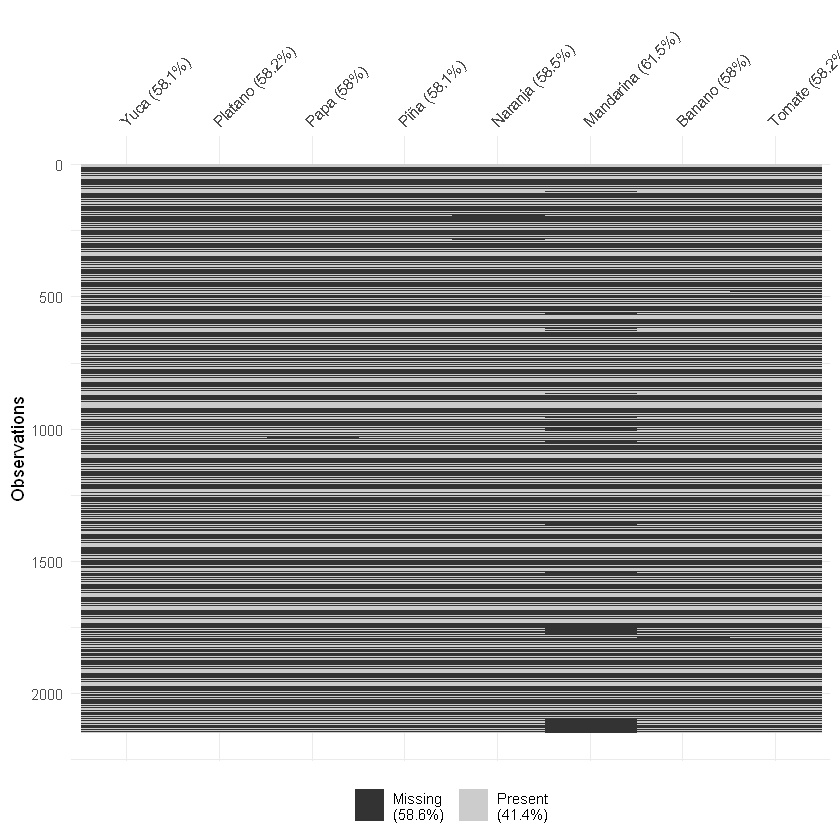

In [9]:
print("Datos faltantes")
vis_miss(DATA[, 2:9])

La anterior grafica permite observar el numero de datos faltantes (missing) y presentes (present) para cada una de una los productos según el numero total de observaciones o datos (observations).

Para la limpieza de los datos se aplica la metodología  "list wise" en la cual se elimina una determinada categoría (DIA) si la cantidad de datos faltantes es significativa. En la siguiente figura se puede observar que la mayor proporción de datos faltantes se encuentra en los días sábado, domingo (días en los que no se generan reportes en el SIPSA y por lo tanto todos son datos faltantes - 100% de los datos son datos faltantes) y los días lunes y miércoles en los que existe una proporción del 98% de datos faltantes.

In [10]:
#En primera medida se realiza un cálculo de datos faltantes por variables o productos
print("Cantidad de datos faltantes por producto")
colSums(is.na(DATA[, 2:9]))

[1] "Cantidad de datos faltantes por producto"


Yuca   Platano      Papa      Piña   Naranja Mandarina    Banano    Tomate 
     1248      1250      1246      1249      1257      1322      1247      1250

Debido a que la cantidad de datos faltantes por producto es superior al 50% de la total de los datos, se procede a analizar el número de datos faltantes por día en cada producto. A continuación, se exponen las gráficas de los datos faltantes según el día. Con esta se puede observar que los días Sábados y Domingos presentan únicamente datos faltantes, lo que se debe a que el SIPSA no genera informes en dichos días. Los días lunes y miércoles por su lado presentan una cantidad de datos faltantes superior a los 300 datos por día.

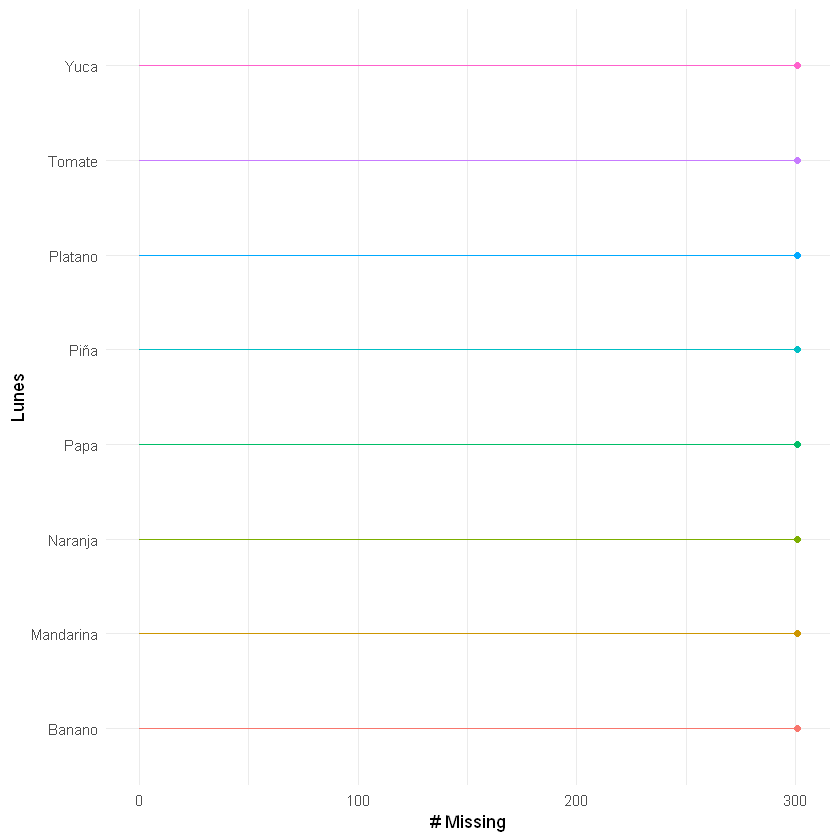

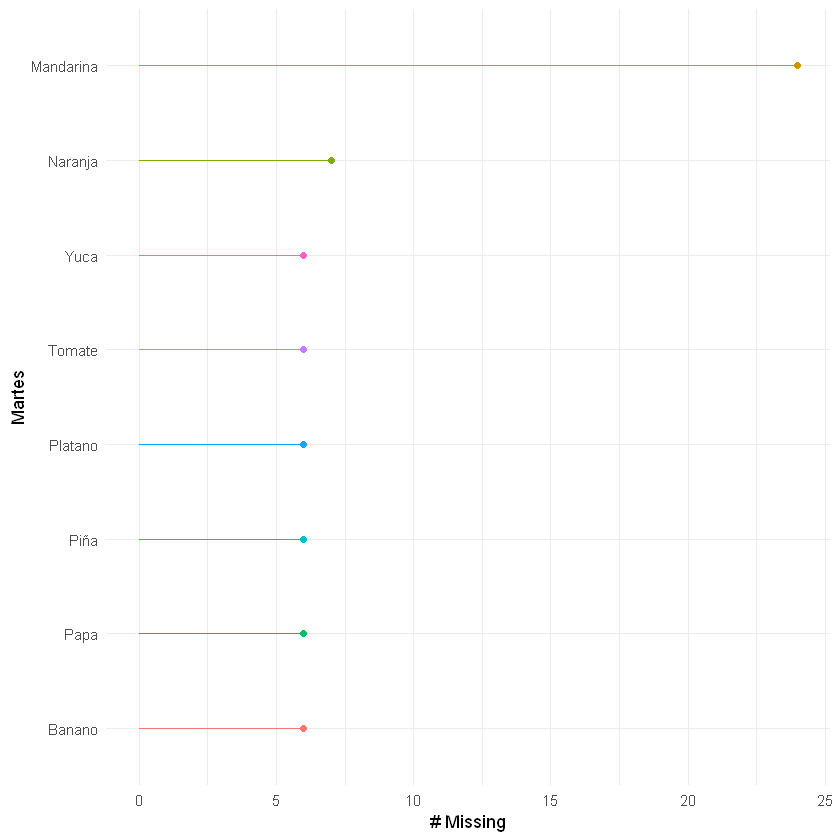

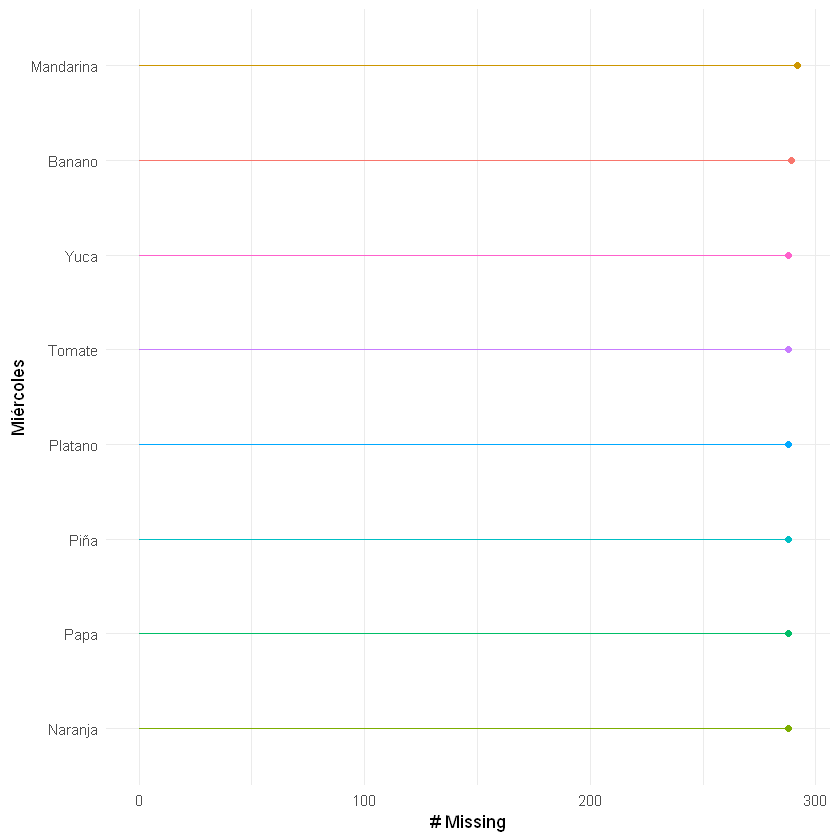

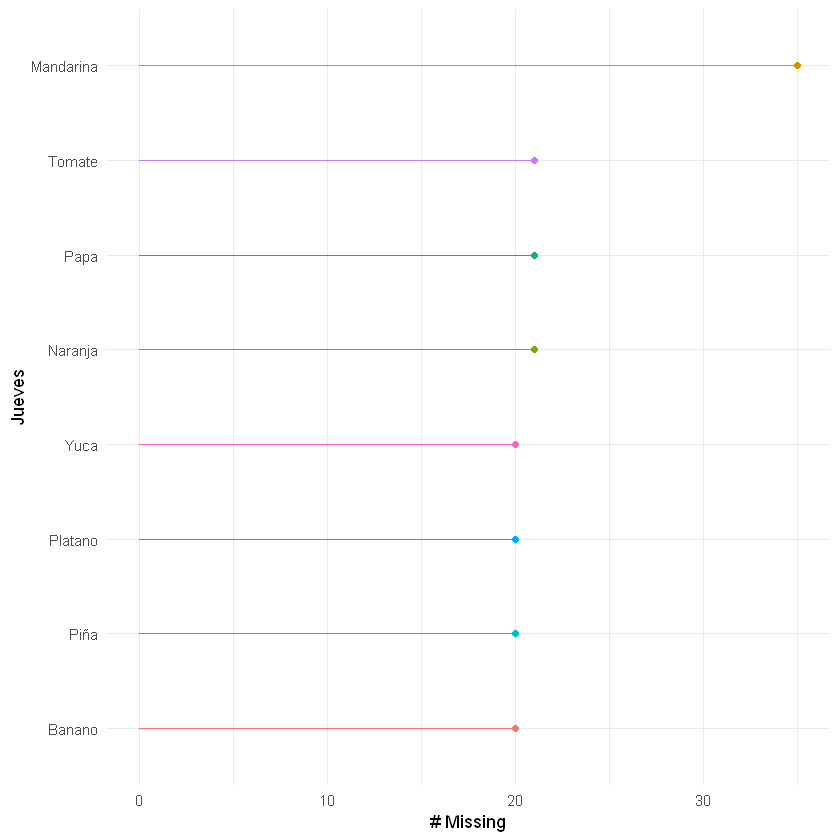

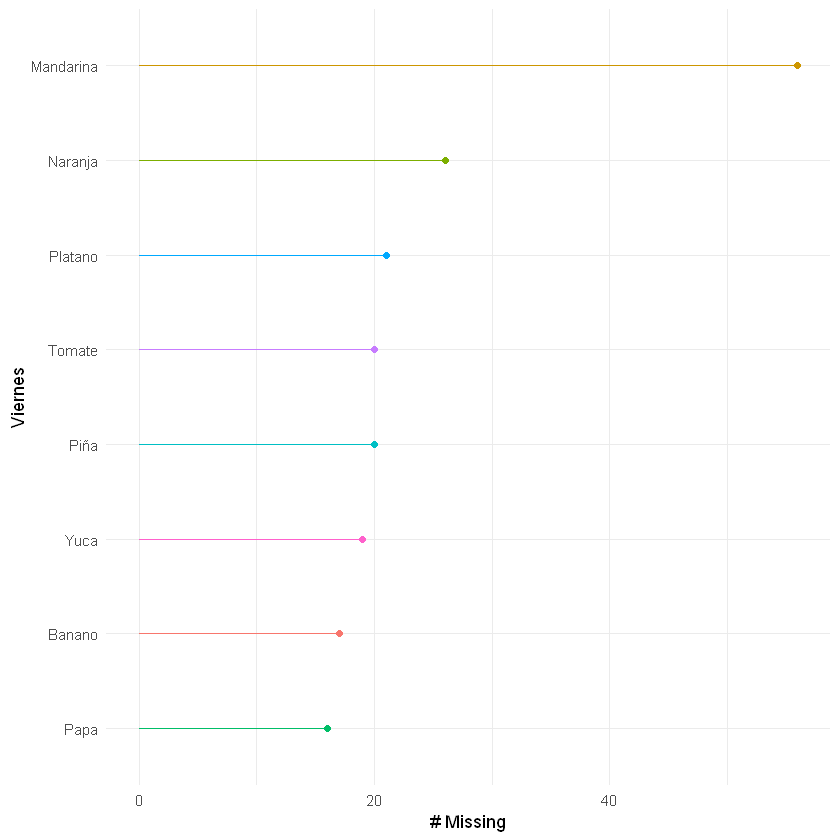

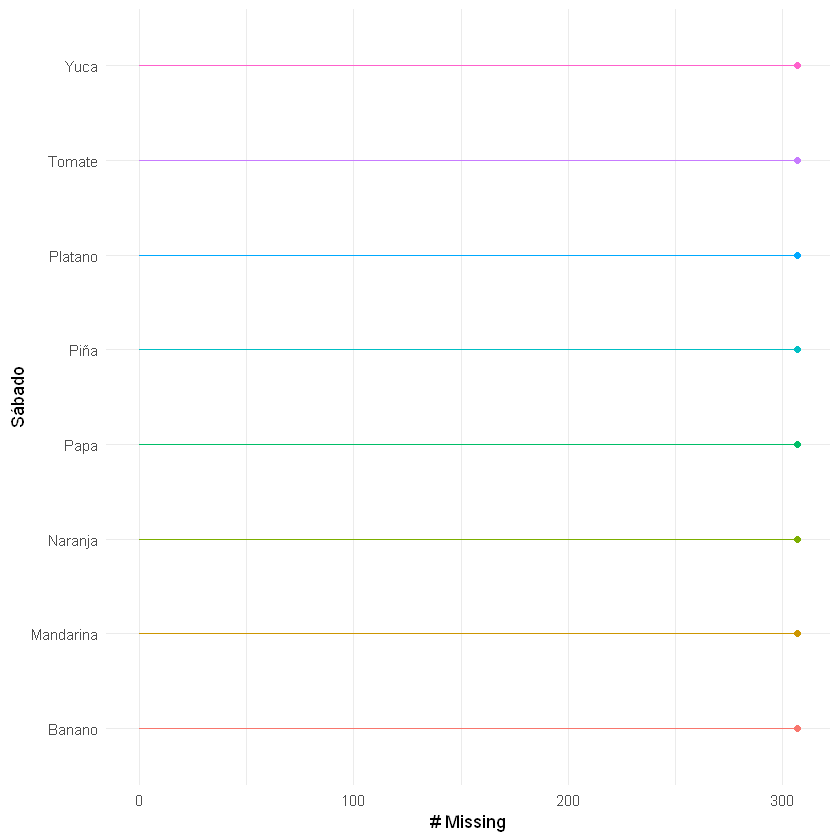

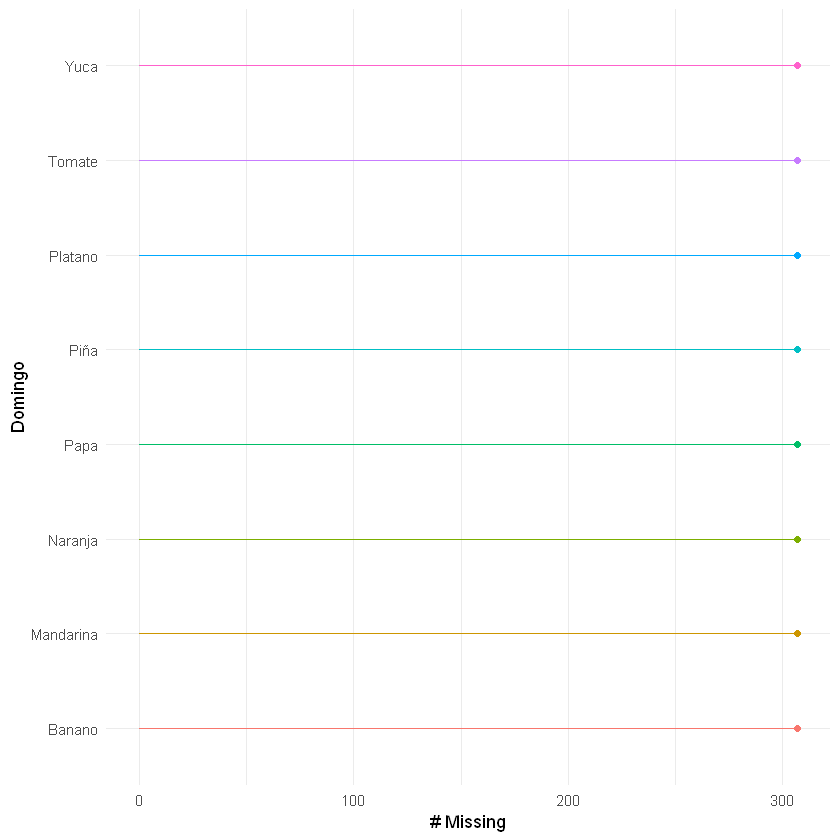

In [11]:
dia<- as.matrix(c("Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"))
# bucle que grafica la proporción de datos faltantes segun del "dia"
for (i in 1:7) {
  print(gg_miss_var((DATA[DATA$Dia%in%c(dia[i,]),][, 2:9])) + labs(x = dia[i]))
}

Debido a esta cantidad de datos faltantes se decide eliminar (list wise) dichas categorías (días) con el objetivo de no incurrir en una alta imputación de datos y así de esta forma no incurrir en errores de precisión.

Una vez eliminados los categorías (lunes, miércoles, sábado y domingo) la base de datos presenta la siguiente proporción de datos faltantes a la cual se le aplicara la imputación seleccionada.

[1] "Cantidad total de datos faltantes en todos los productos segun el dia"
[1] 67
[1] 178
[1] 195


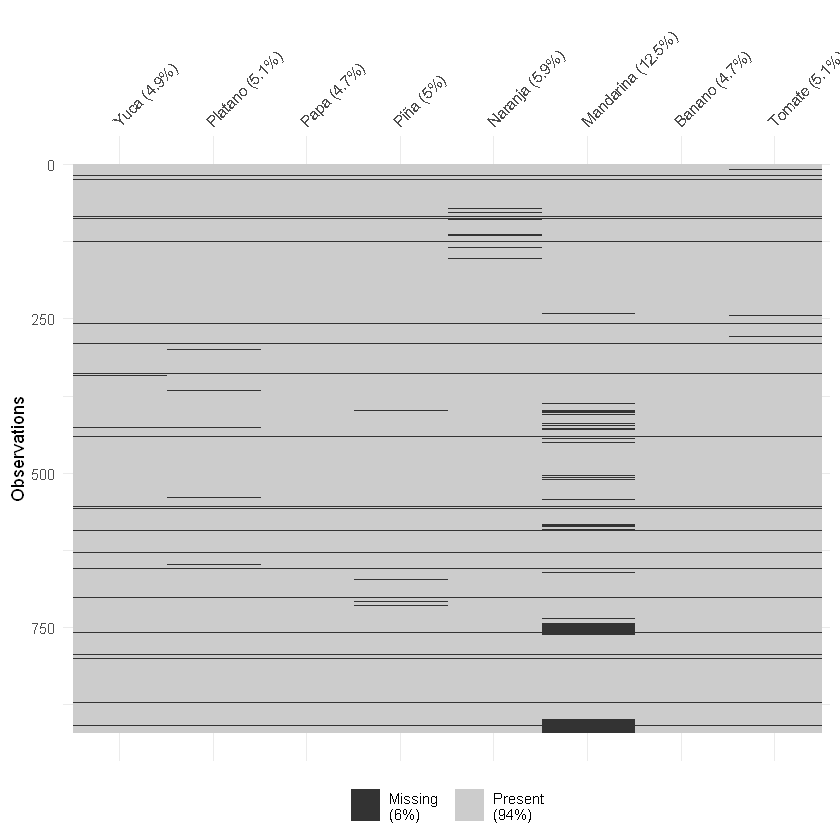

In [12]:
DATA<-data.frame(DATA[DATA$Dia%in%c("Martes", "Jueves", "Viernes"),][, 1:10])
vis_miss(DATA[, 2:9])

print("Cantidad total de datos faltantes en todos los productos segun el dia")
for (i in c(2,4,5)) {
print(sum(is.na((DATA[DATA$Dia%in%c(dia[i,]),][, 2:9]))== TRUE))
}

# 67, 178 y 195 representa el número de NA en cada producto para el dia martes, miercoles y viernes

En las gráficas anteriores se puede observar que el número de datos a imputar es aproximadamente del 5% (menos de 60 datos) en todos los casos a excepción de la mandarina donde existe una cantidad total aproximada de 120 datos faltantes.

## 1.3 Imputación de datos

Para la imputación de datos se utilizan 5 diferentes metodologías, las cuales se exponen a continuación. Se aclara que la imputación se realiza a toda la cantidad de datos sin discriminar con el objetivo de mantener los efectos que los días puedan presentar en la serie histórica. A continuación, se presentan las gráficas de los datos antes de ser imputados.

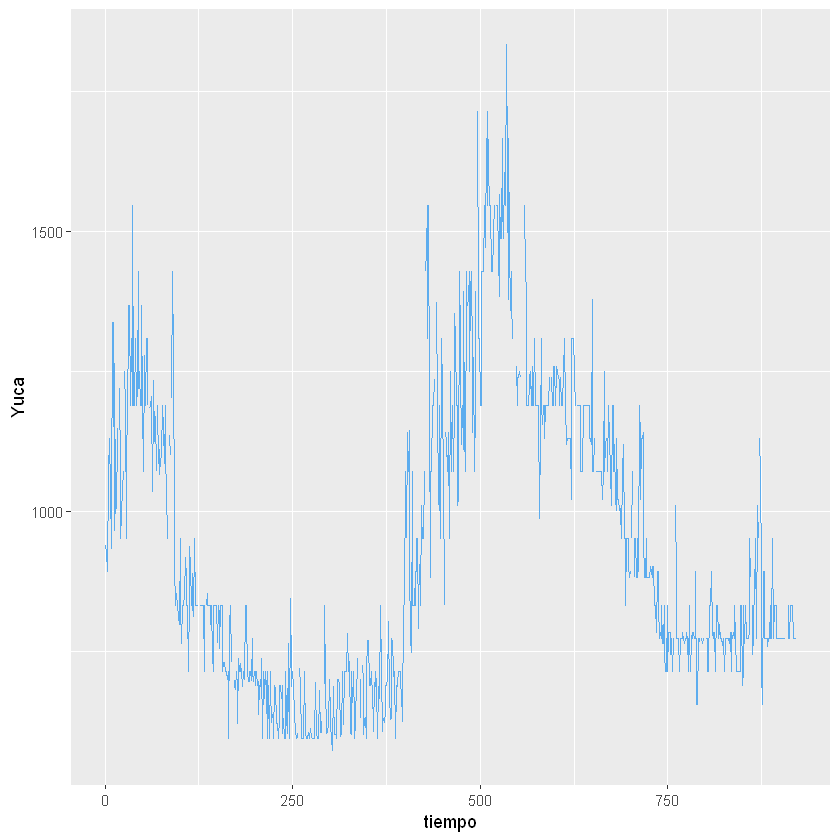

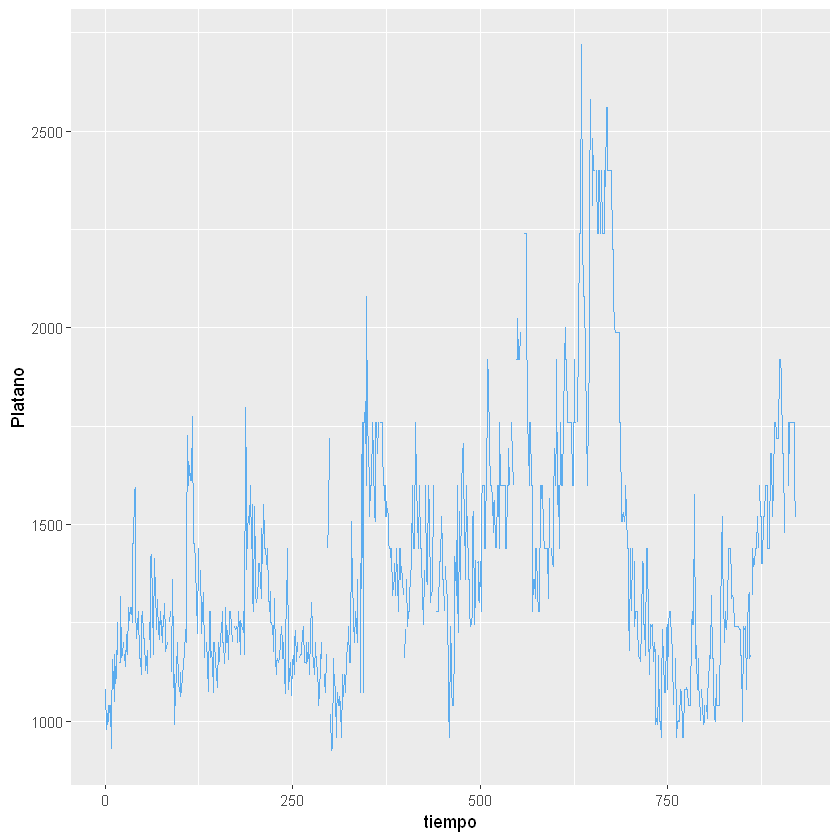

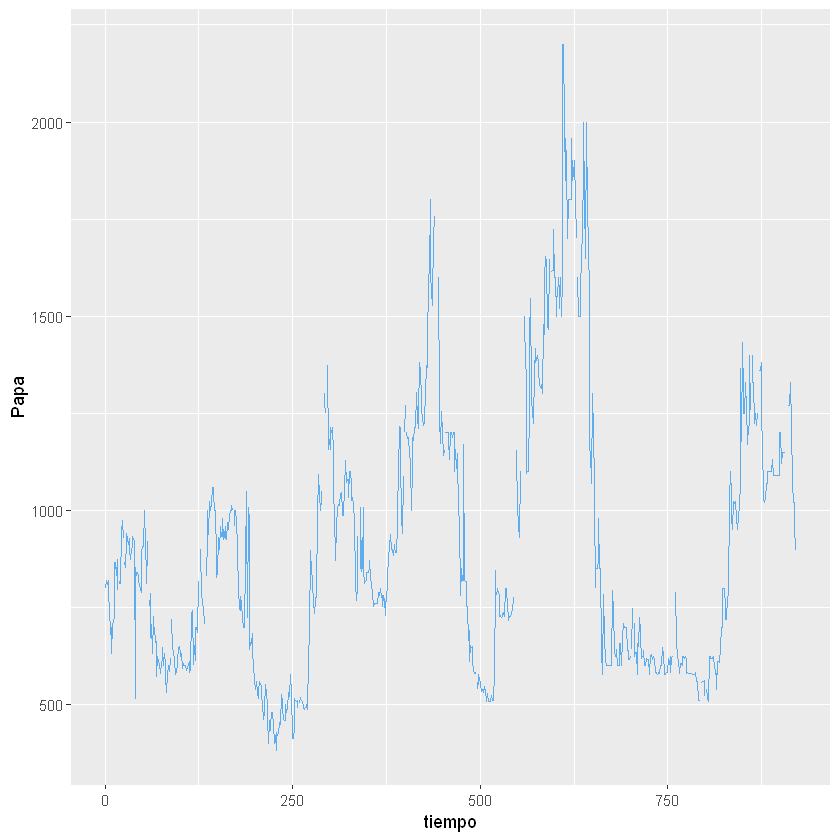

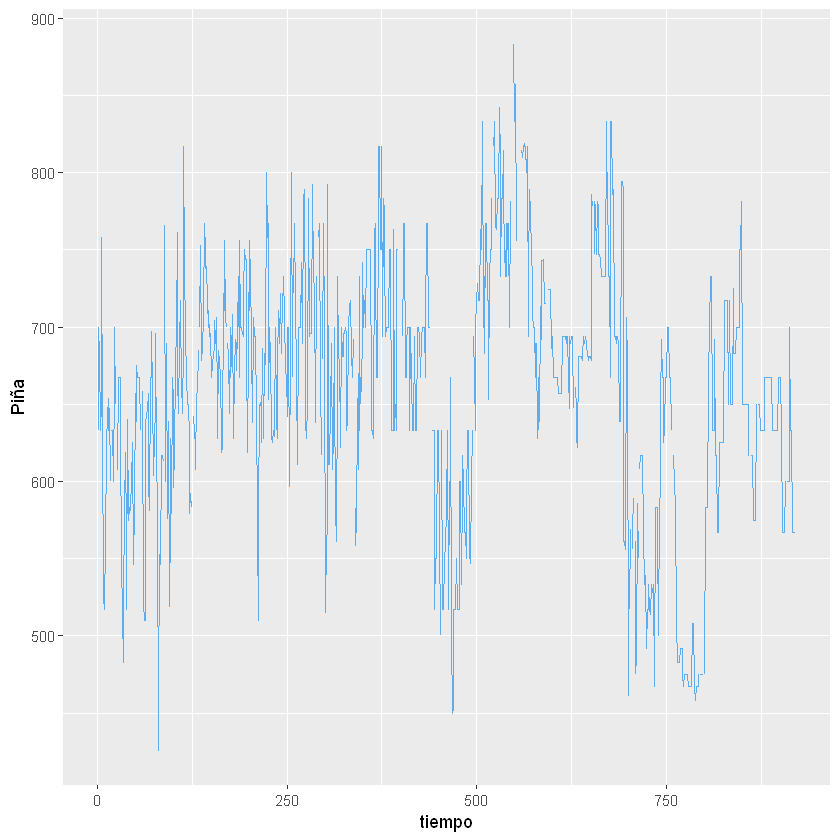

Warning message:
"Removed 20 rows containing missing values (geom_path)."

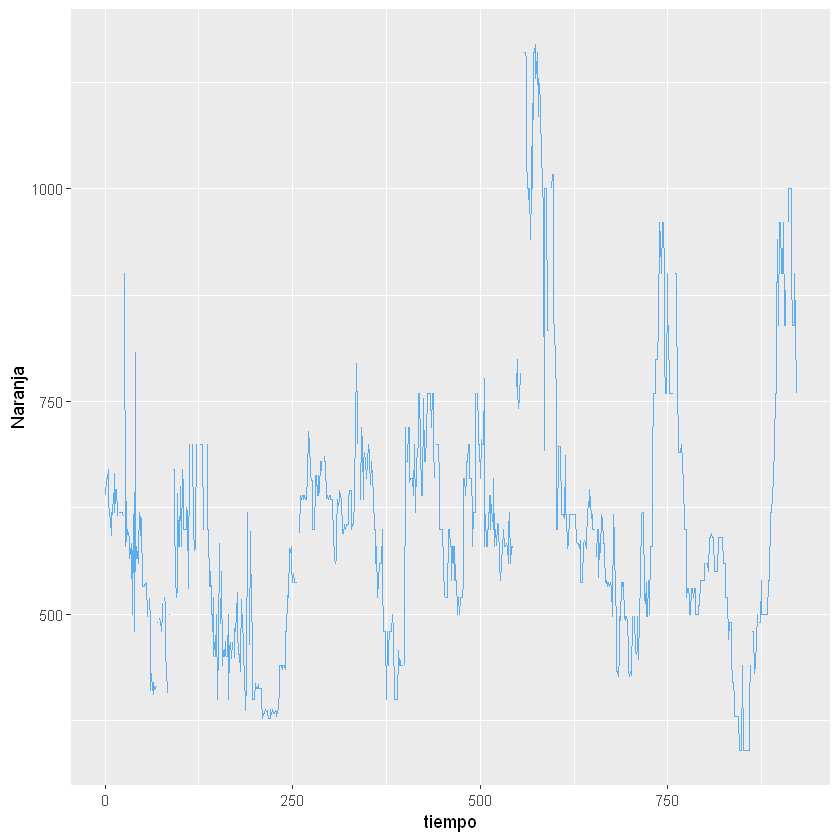

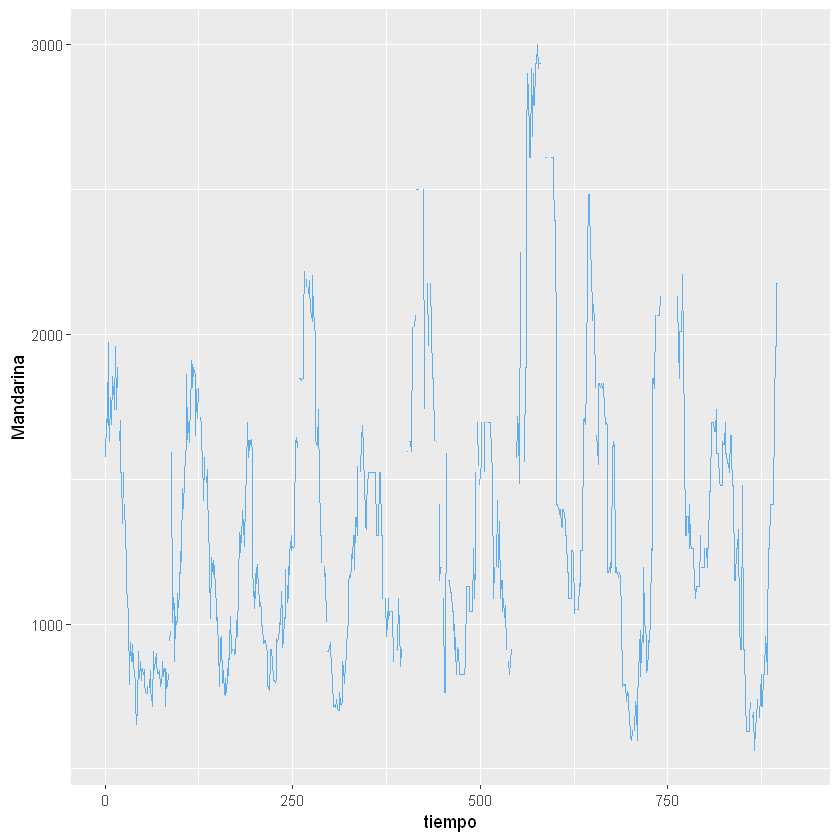

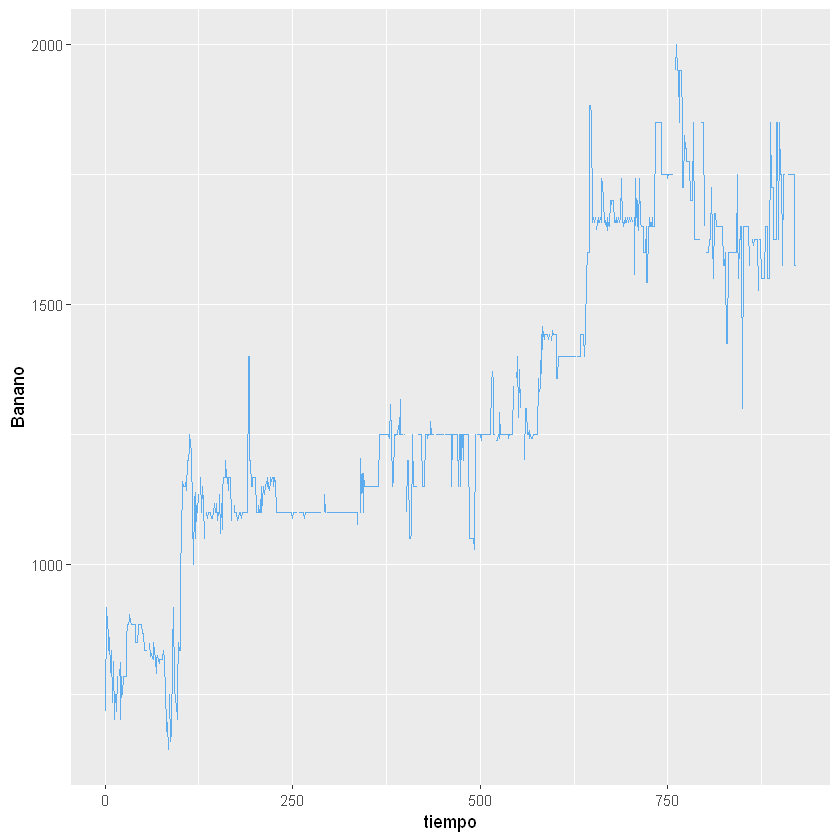

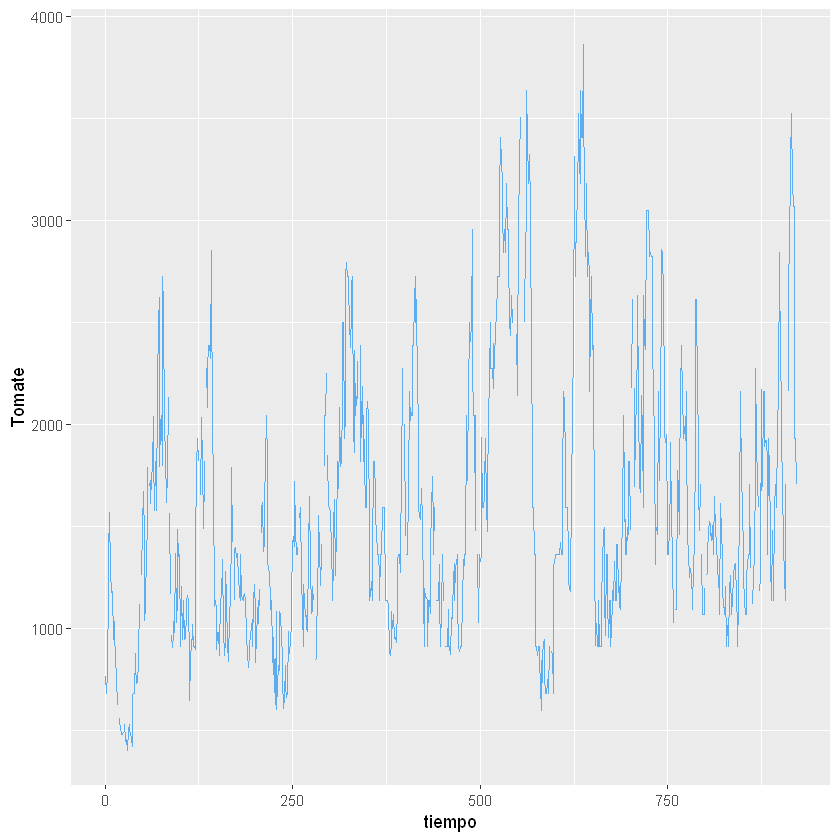

In [13]:
producto<- as.matrix(c("", "Yuca", "Platano", "Papa", "Piña", "Naranja", "Mandarina", "Banano", "Tomate"))
tiempo<- c(1:921) #ejemplifica la linea temporal en la grafica
for (i in 2:9) {
  print(ggplot(data.frame(tiempo, DATA[,i]), aes(x=tiempo))+
  geom_line(aes(y=DATA[,i]), col = "steelblue2")+ labs(y = producto[i]))         
}

El primer tipo de imputación que se presenta es la imputación basada en una venta móvil con el uso de K=5 vecinos próximos para su desarrollo; esta imputación utiliza 5 datos hacia arriba y hacia abajo en el horizonte de tiempo para su imputación. A continuación se puede observar el comportamiento de los datos imputados.

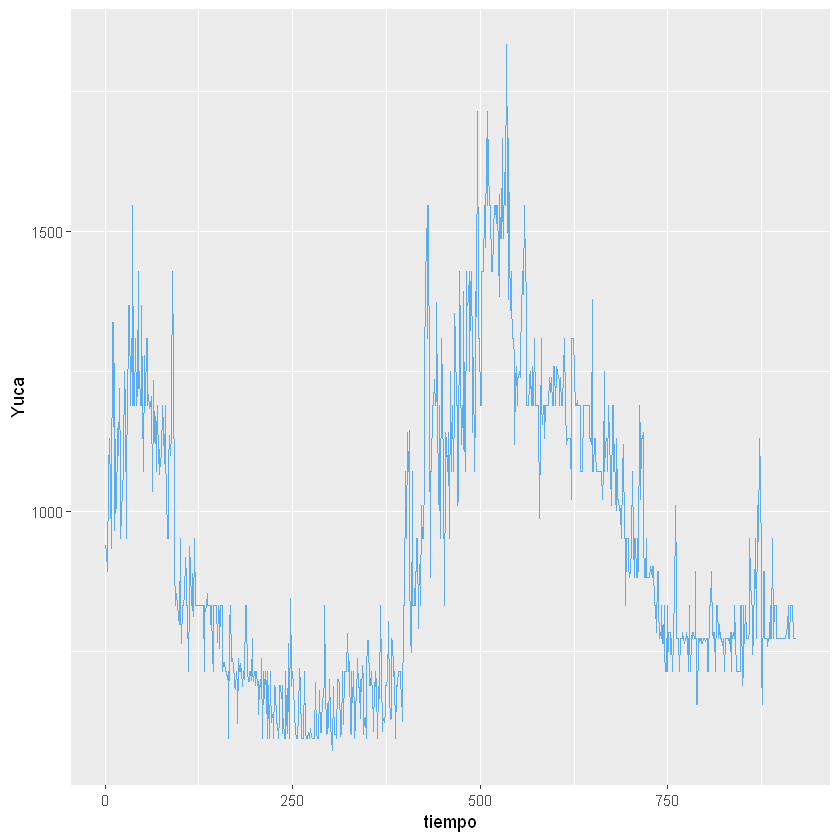

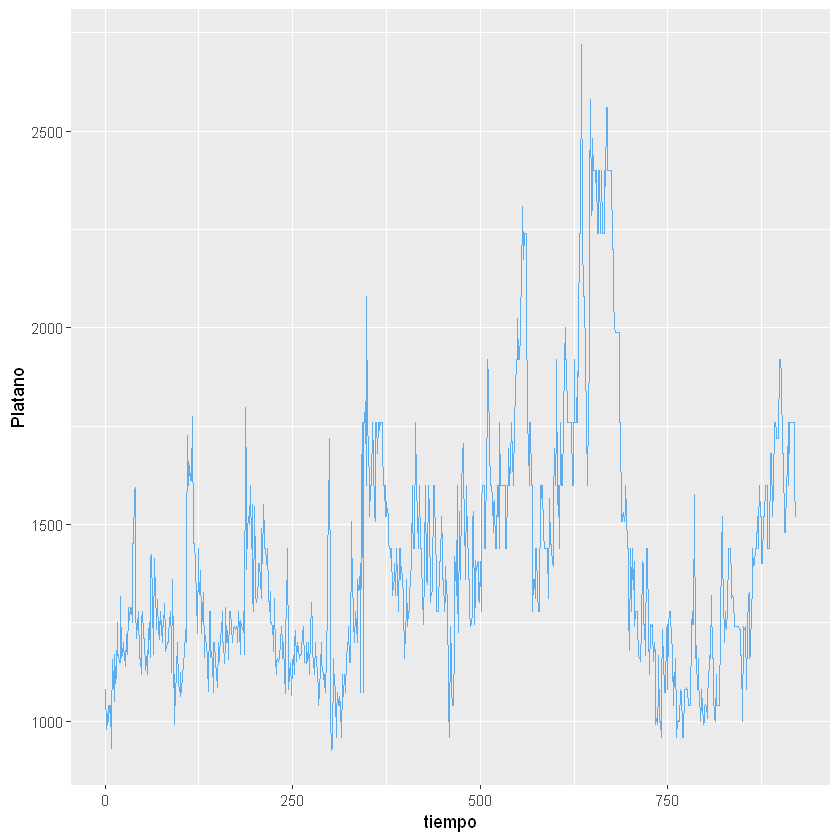

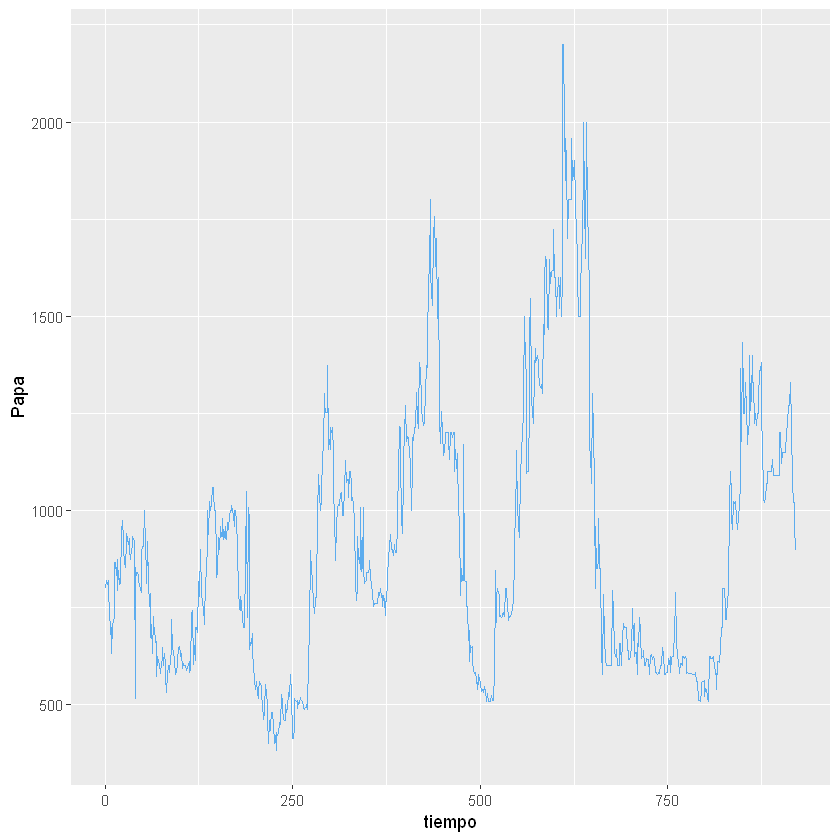

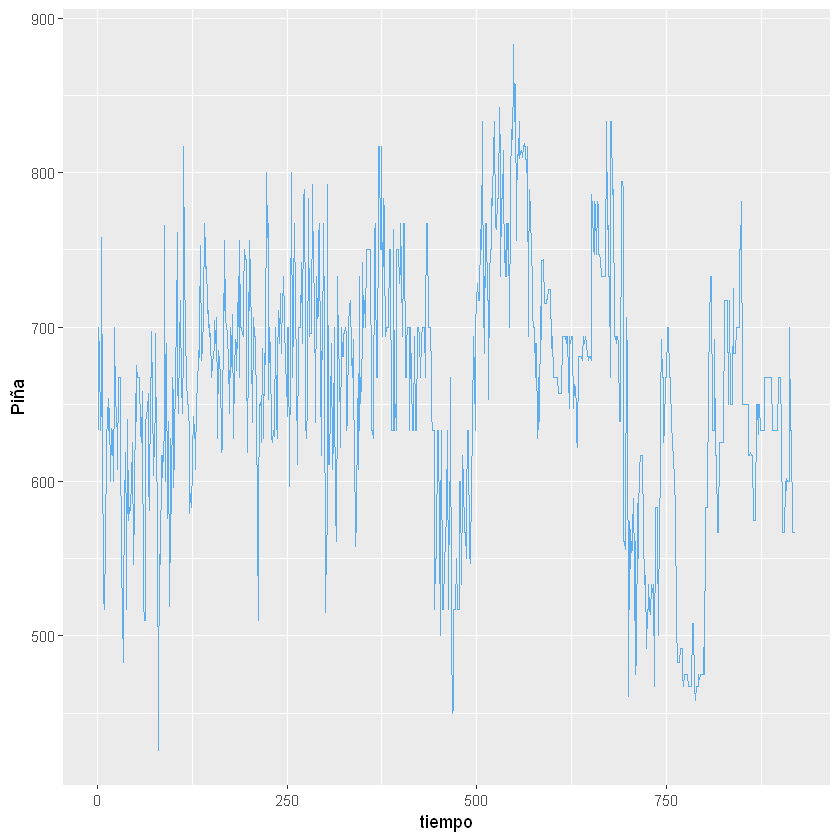

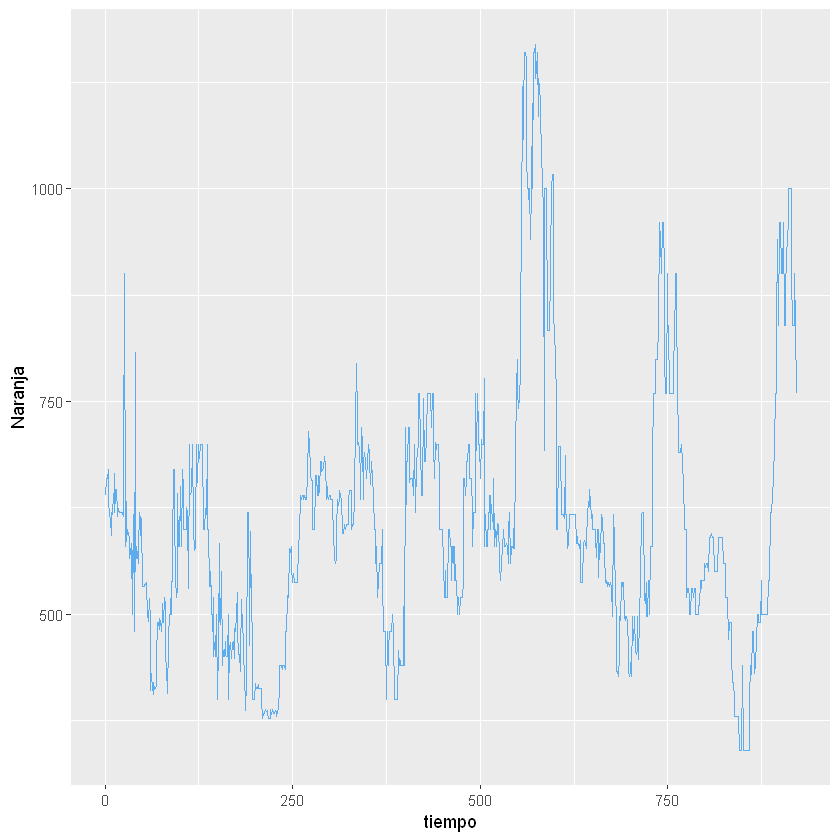

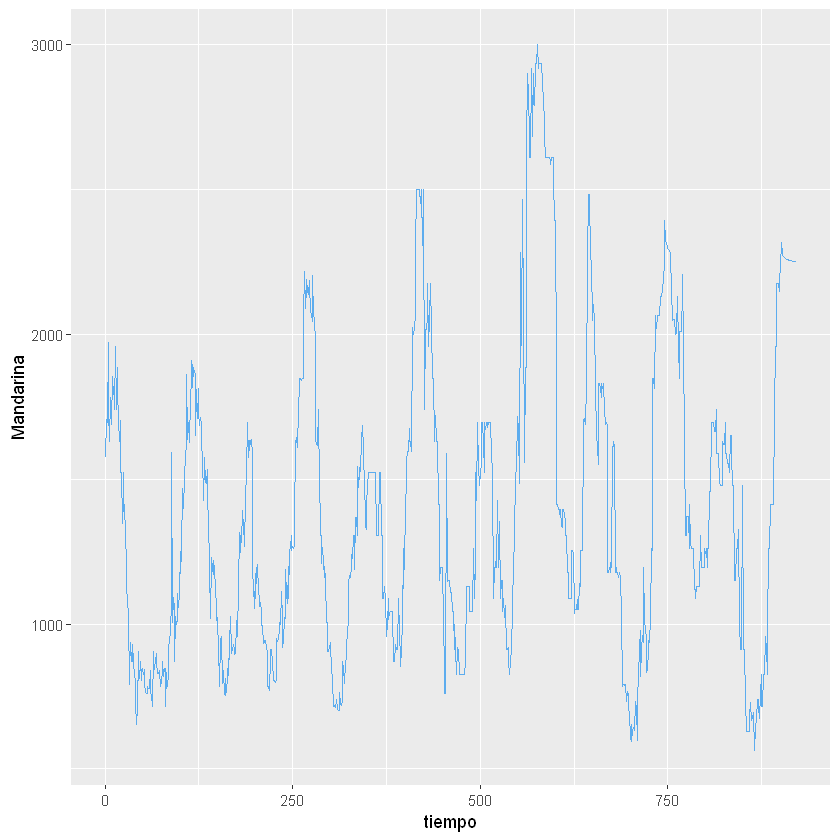

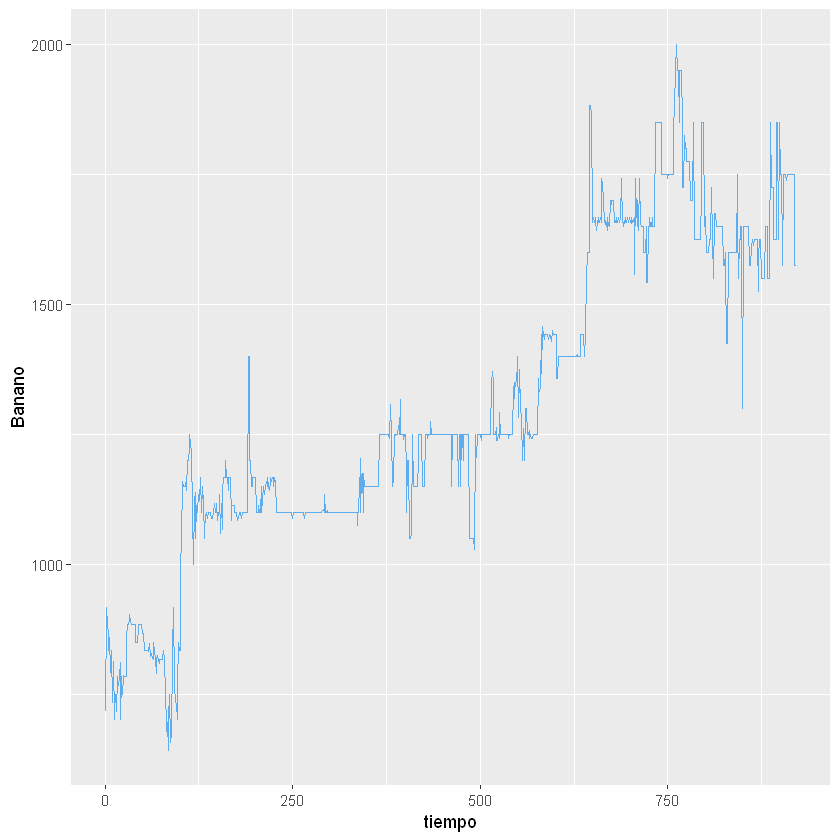

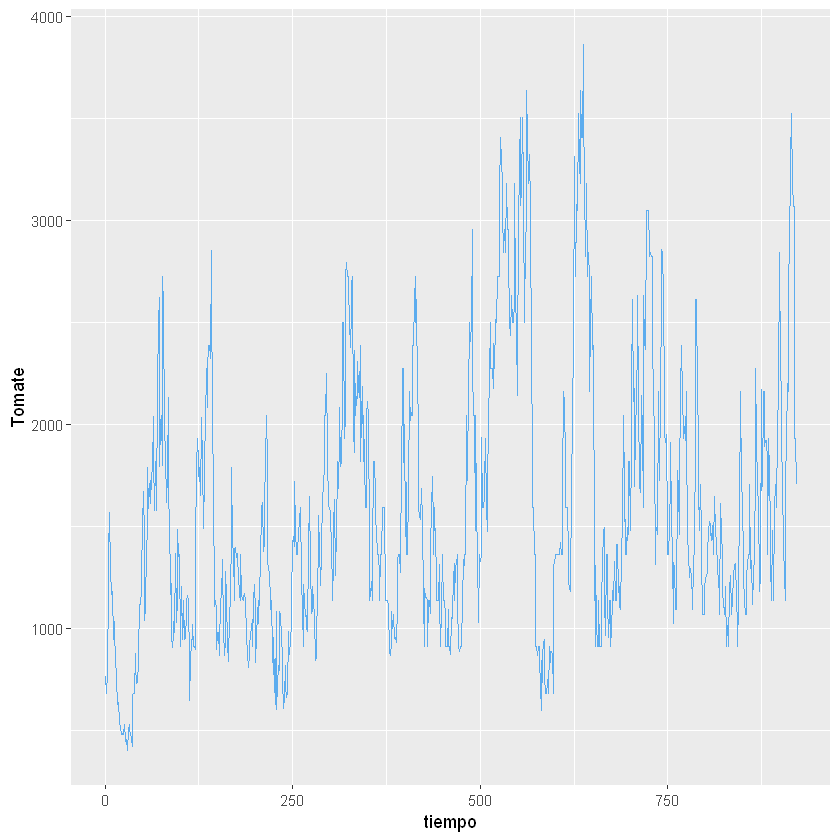

In [14]:
DATA1<- matrix(0, 921, 10) #Data generada para la imputación K=5
DATA2<- matrix(0, 921, 10) #Data generada para la imputación con base en la media
DATA3<- matrix(0, 921, 10) #Data generada para la imputación con base en la mediana
DATA4<- matrix(0, 921, 10) #Data generada para la imputación con base en la moda
DATA5<- matrix(0, 921, 10) #Data generada para la imputación con base en una interpolación lineal

# Imputación basada en los dos vecinos proximos
tiempo<- c(1:921)
for (i in 2:9) {
 
DATA1[,i]<-na.ma(DATA[,i], k = 5, weighting = "linear")
  print(ggplot(data.frame(tiempo, DATA1[,i]), 
  aes(x=tiempo))+geom_line(aes(y=DATA1[,i]), 
  col = "steelblue2")+ labs(y = producto[i]))         
}

El segundo, tercer y cuarto tipo de imputación esta basado en el reemplazo de datos con el uso de la media, mediana y moda.

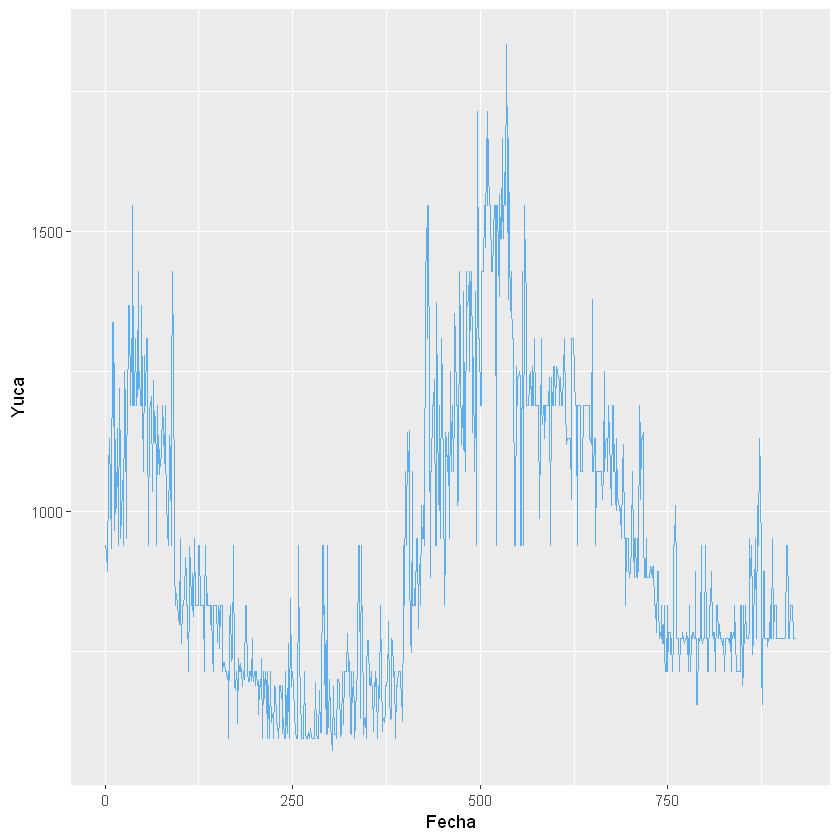

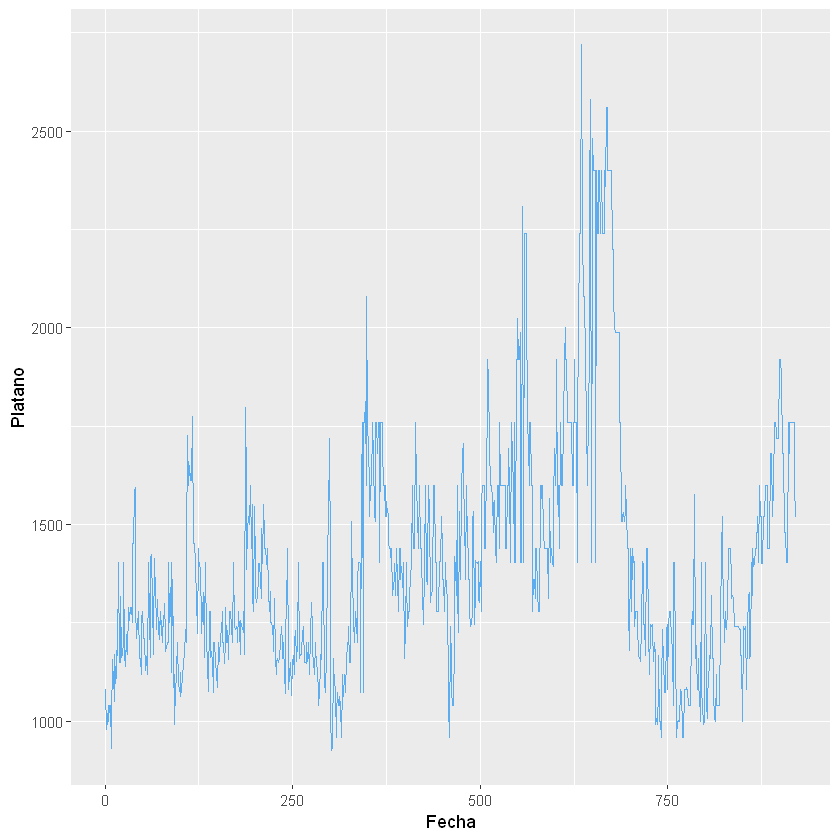

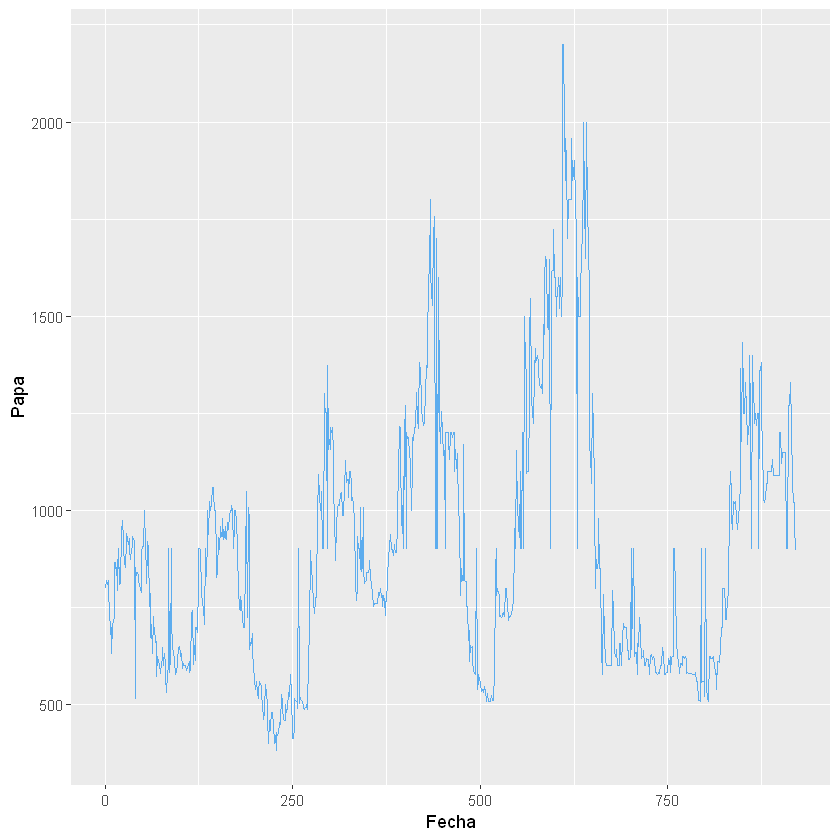

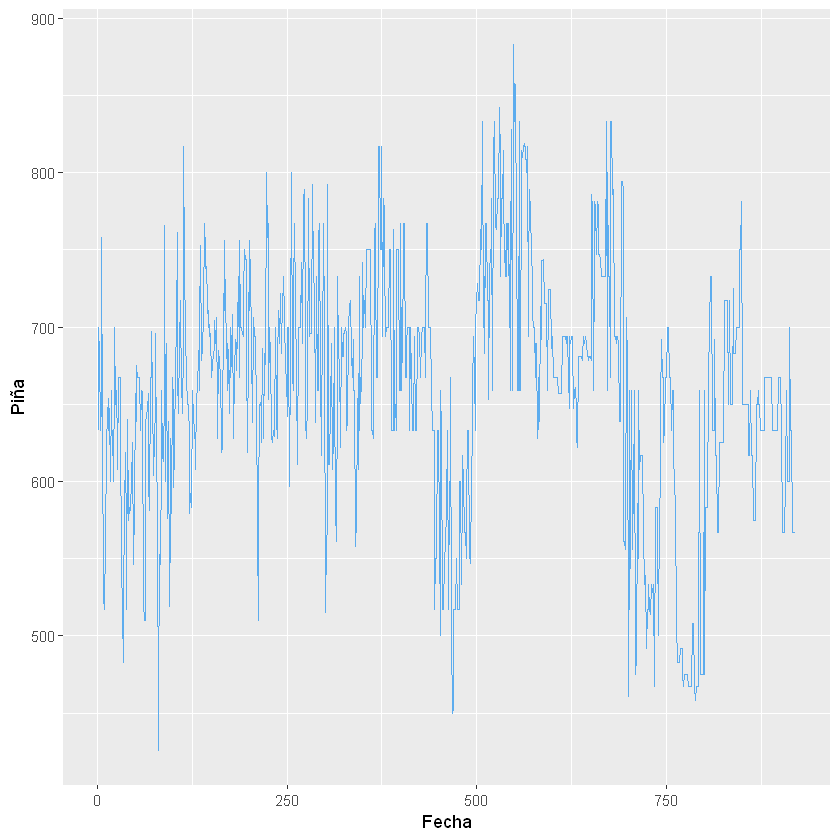

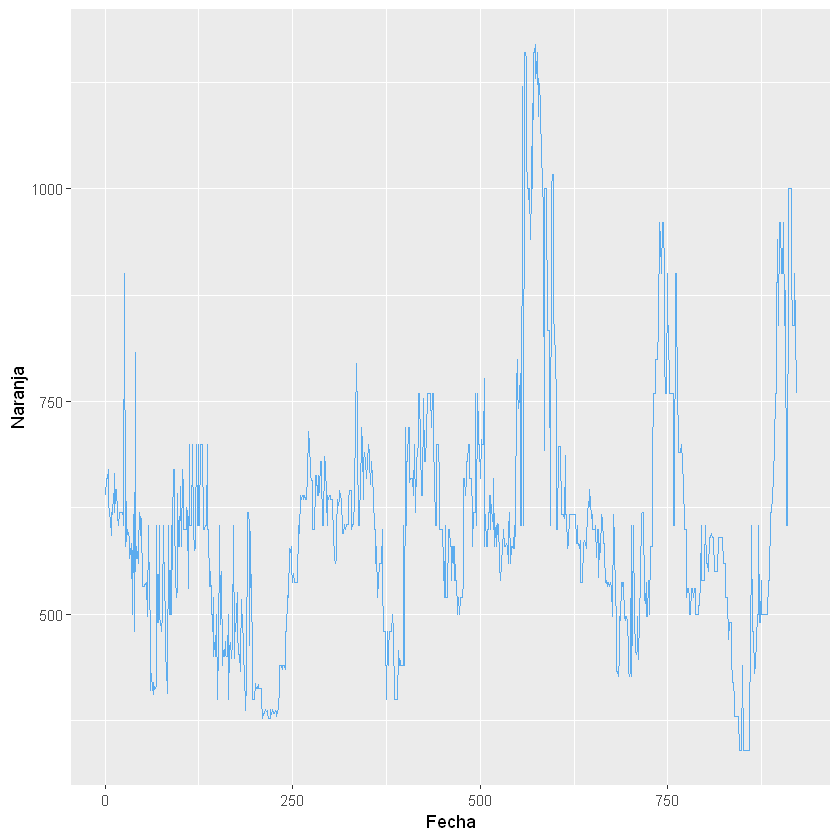

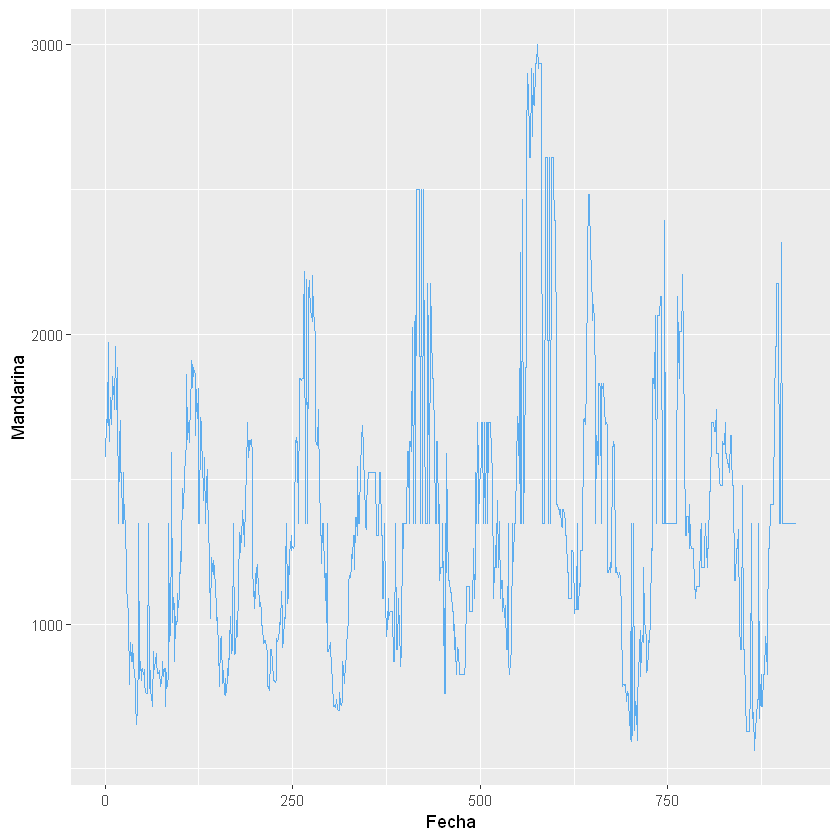

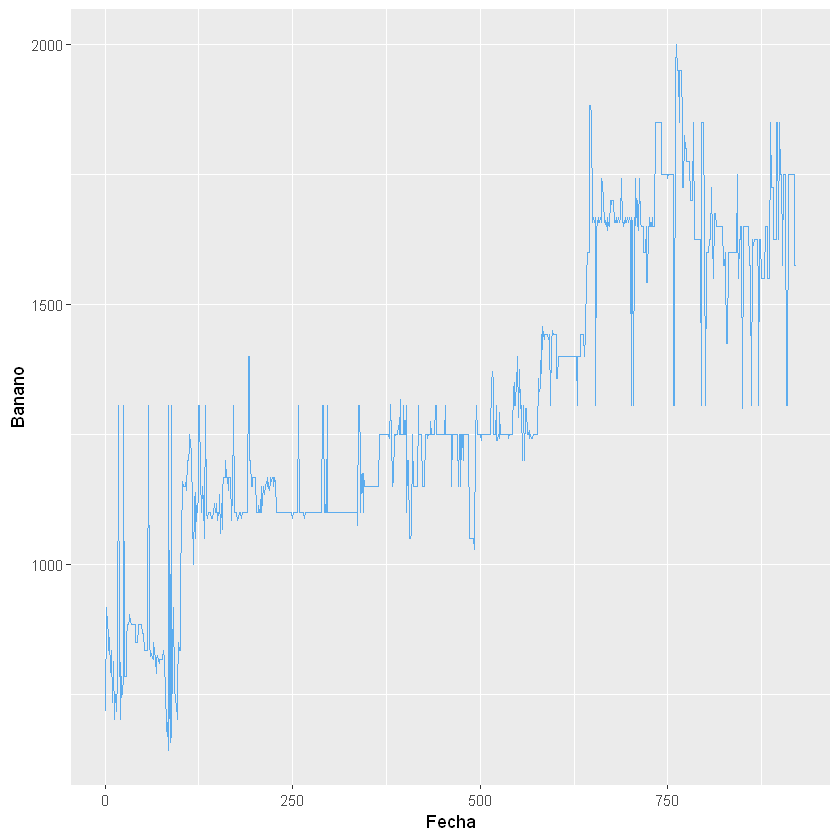

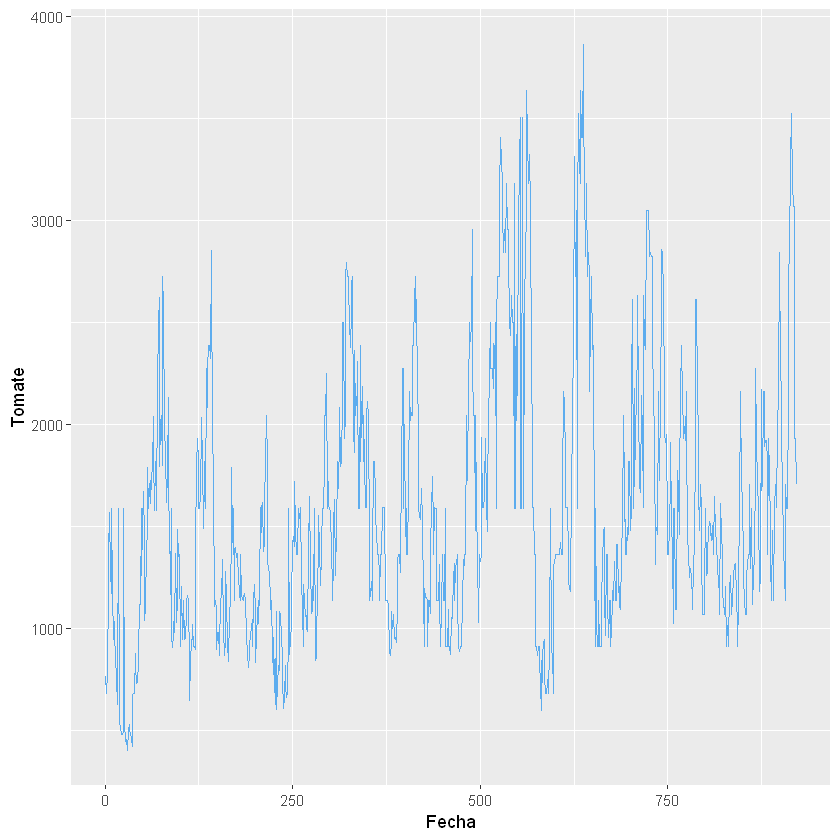

In [58]:
# Imputación basada en la media

for (i in 2:9) {
 DATA2[,i]<-na.mean(DATA[,i], option = "mean")
 print(ggplot(data.frame(tiempo, DATA2[,i]), aes(x=tiempo))+geom_line(aes(y=DATA2[,i]), 
 col = "steelblue2")+ labs(y = producto[i])+ xlab(names(DATA[1])))         
}

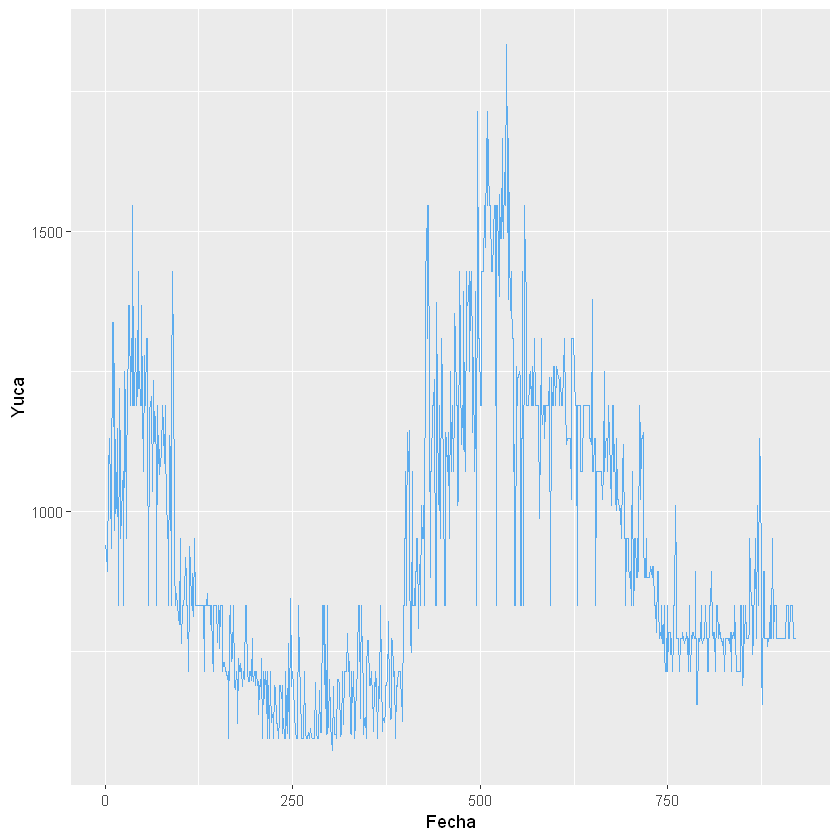

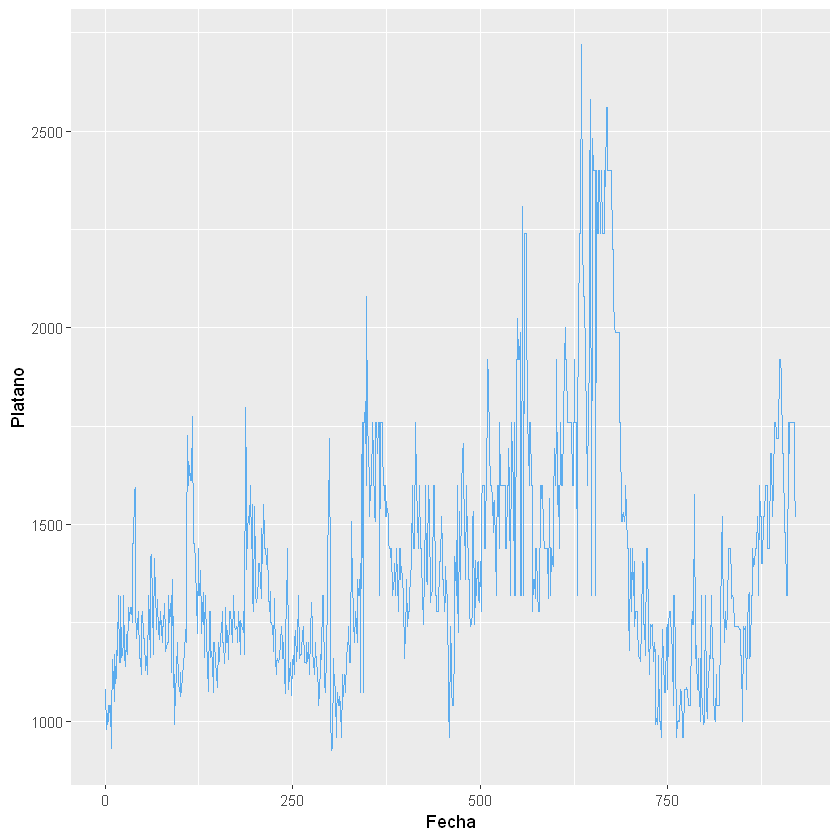

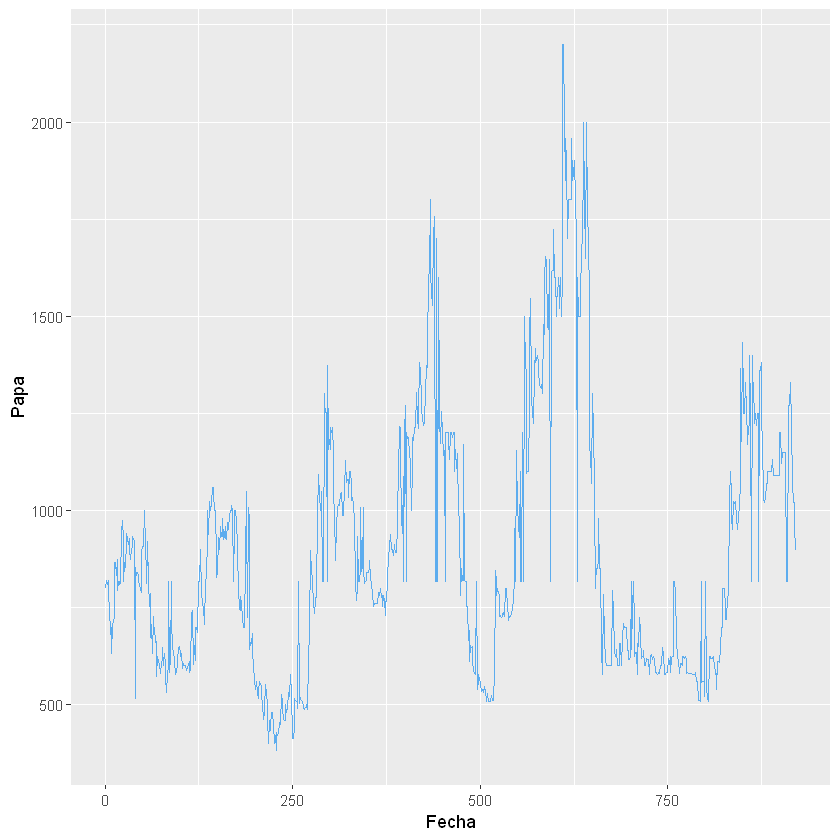

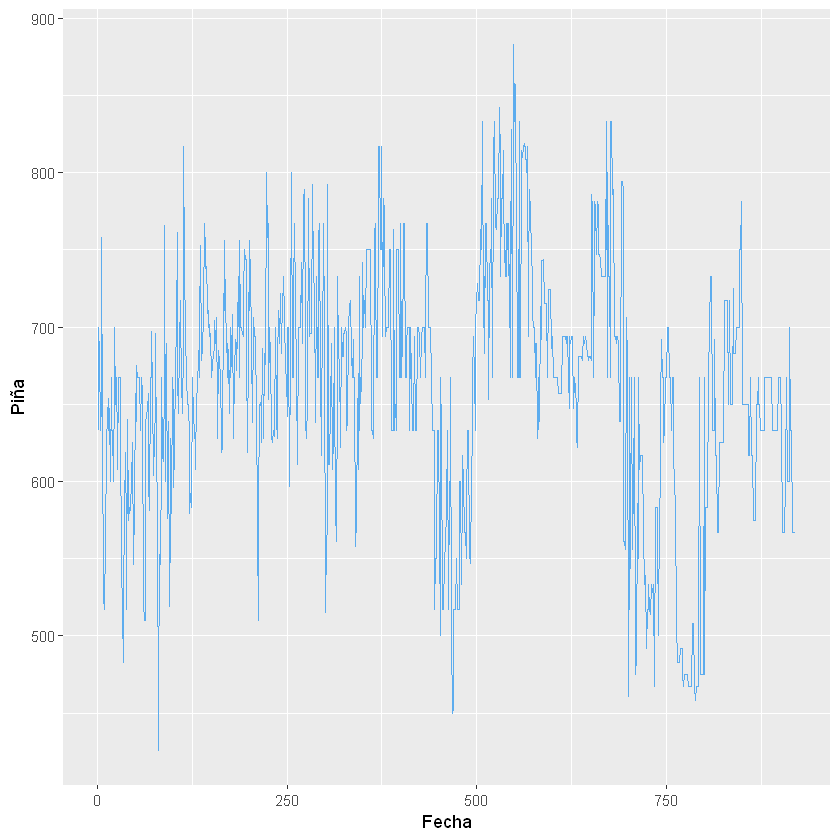

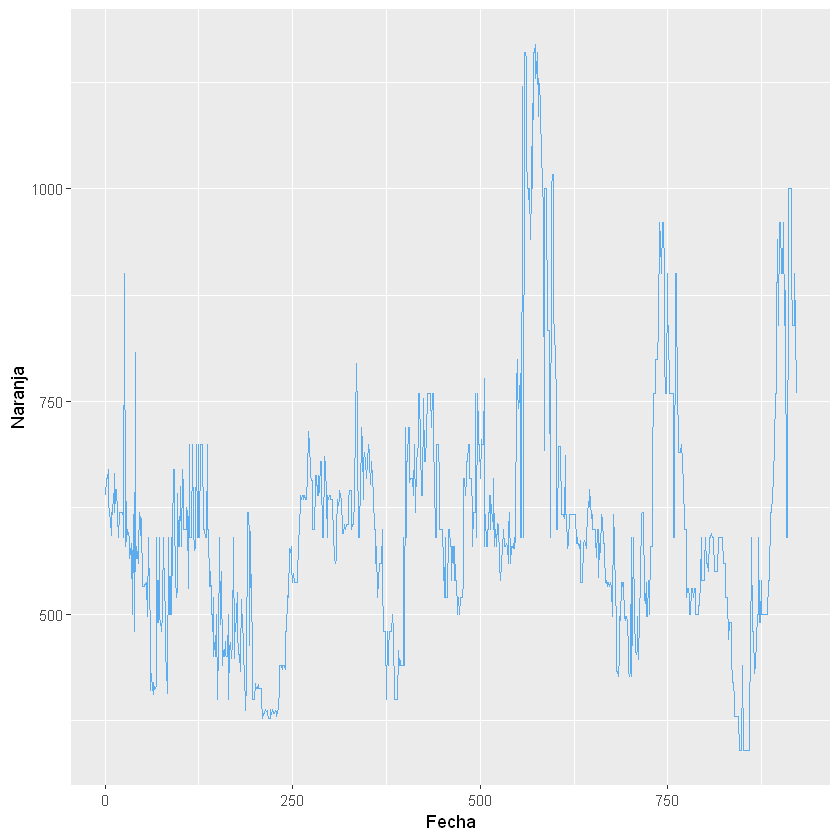

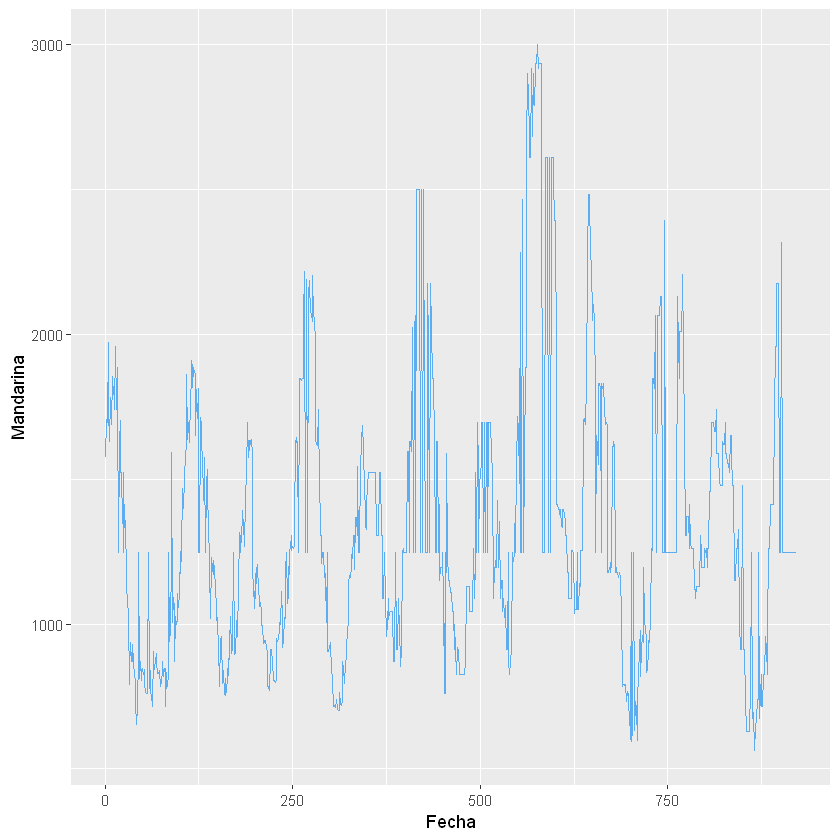

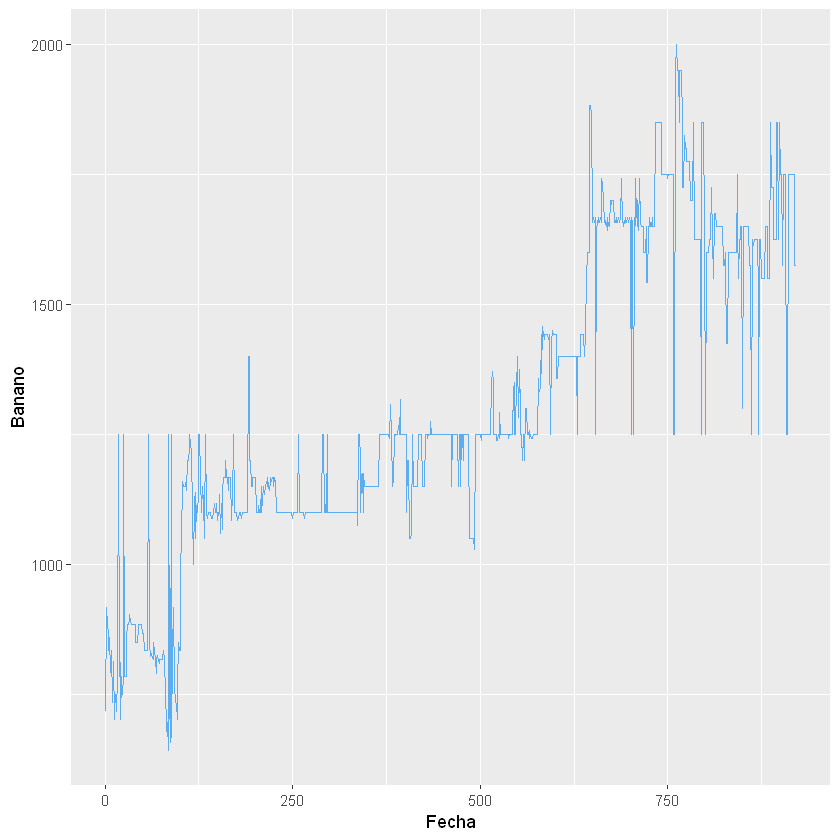

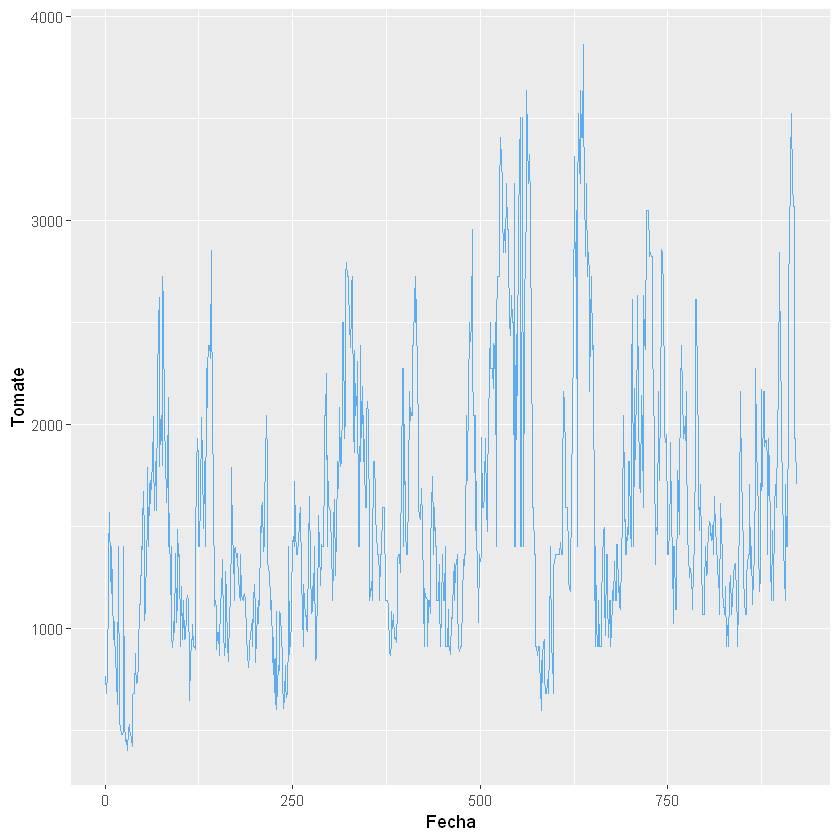

In [59]:
# Imputación basada en la mediana

for (i in 2:9) {
 DATA3[,i]<-na.mean(DATA[,i], option = "median")
 print(ggplot(data.frame(tiempo, DATA3[,i]), aes(x=tiempo))+geom_line(aes(y=DATA3[,i]), 
 col = "steelblue2")+ labs(y = producto[i])+ xlab(names(DATA[1])))         
}

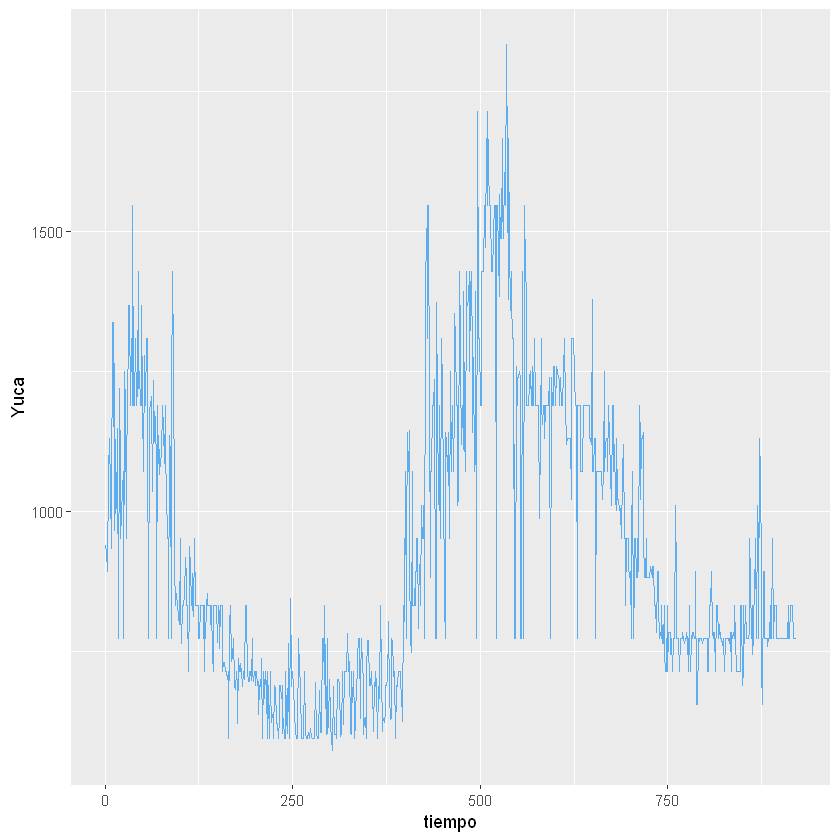

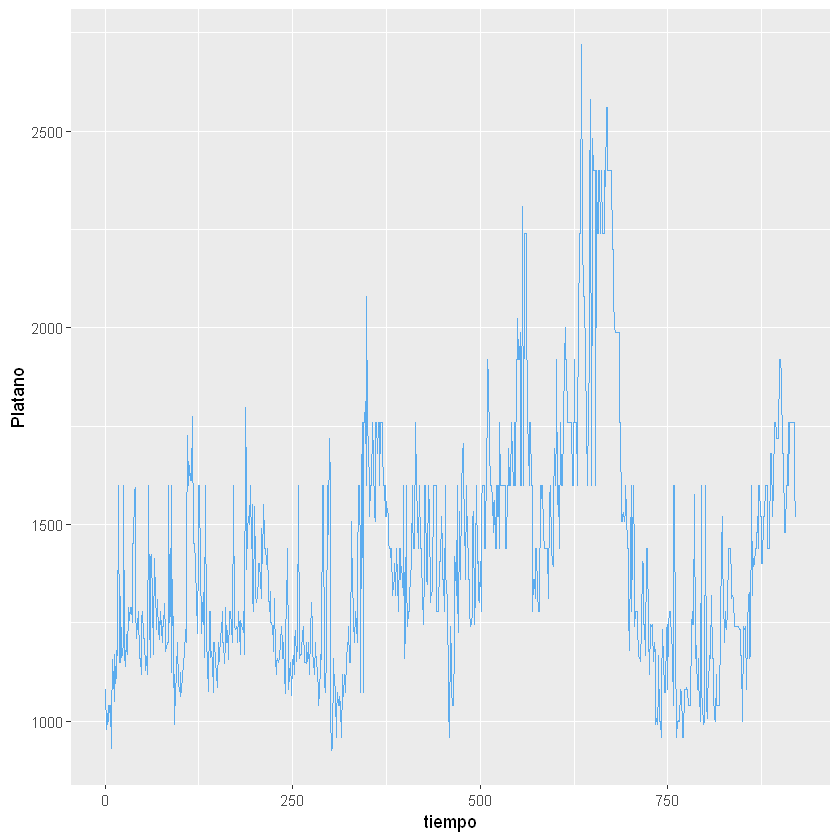

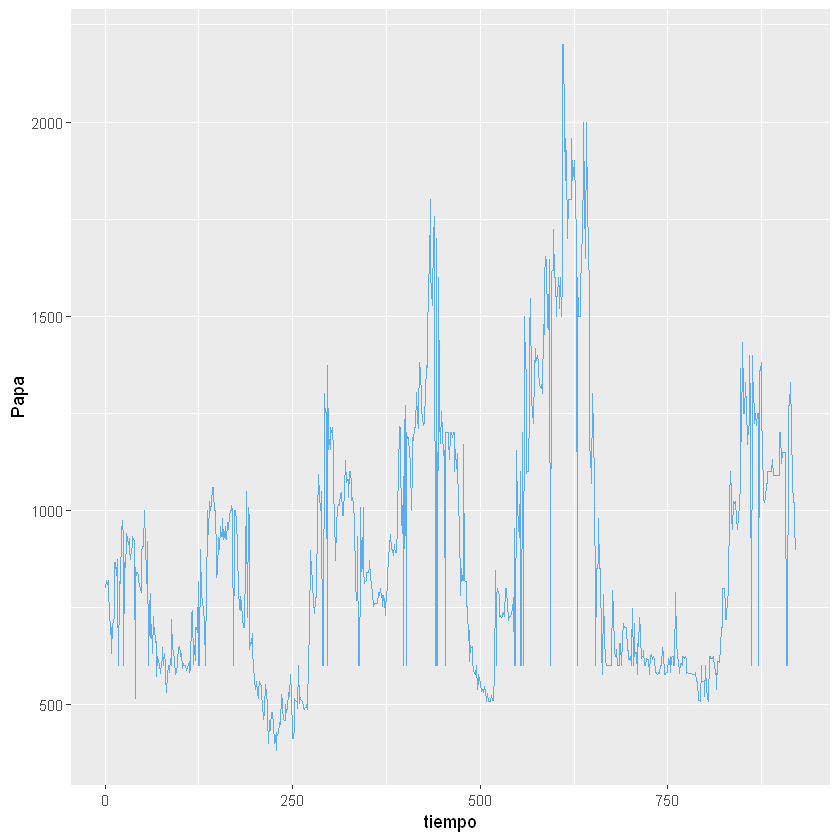

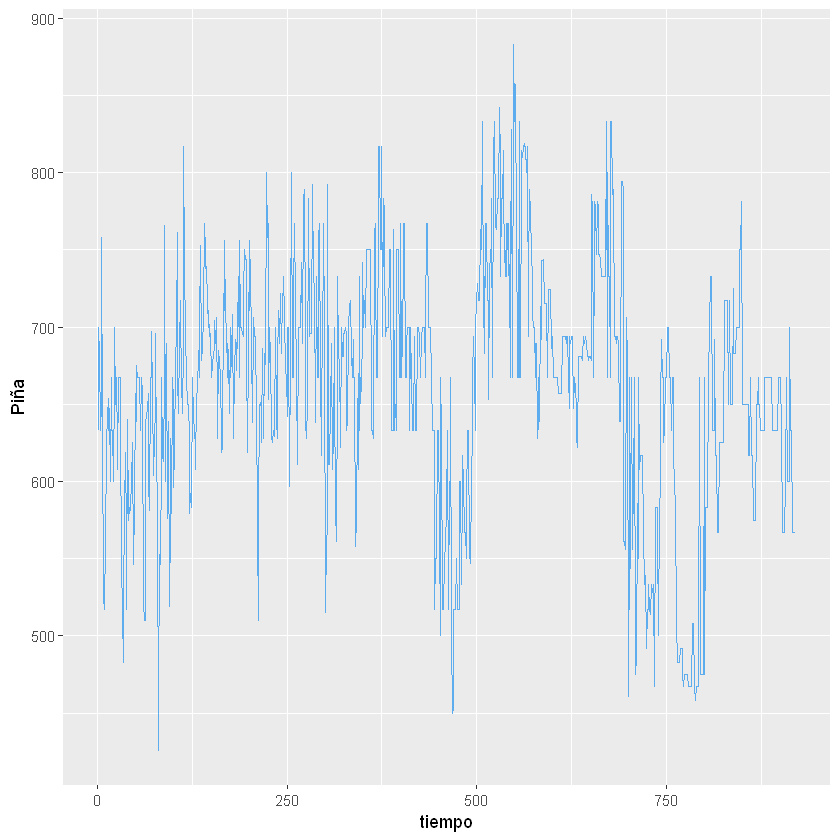

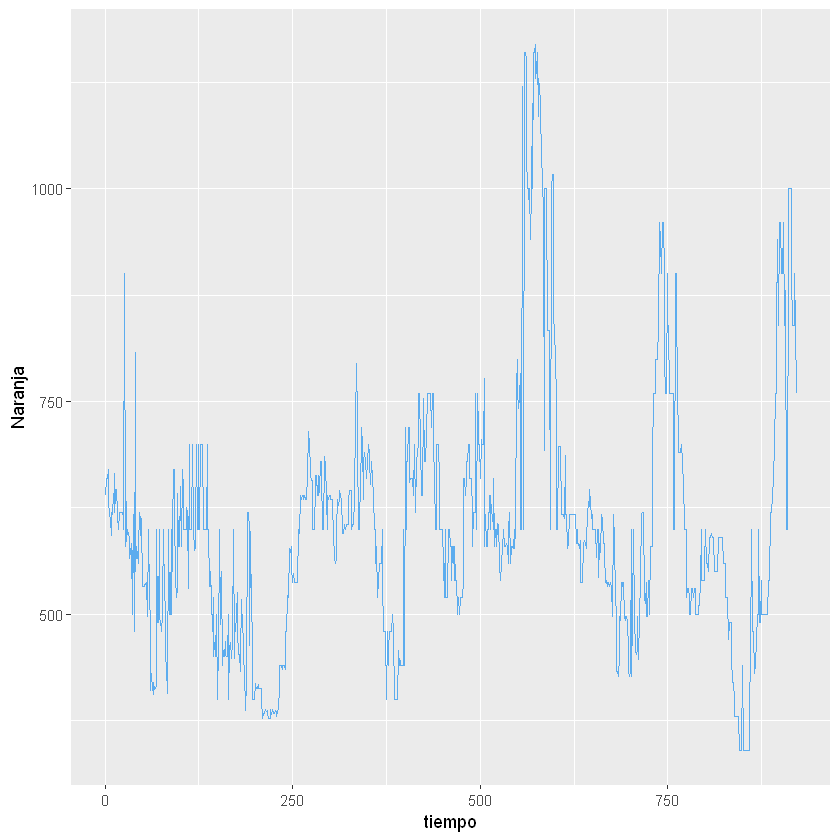

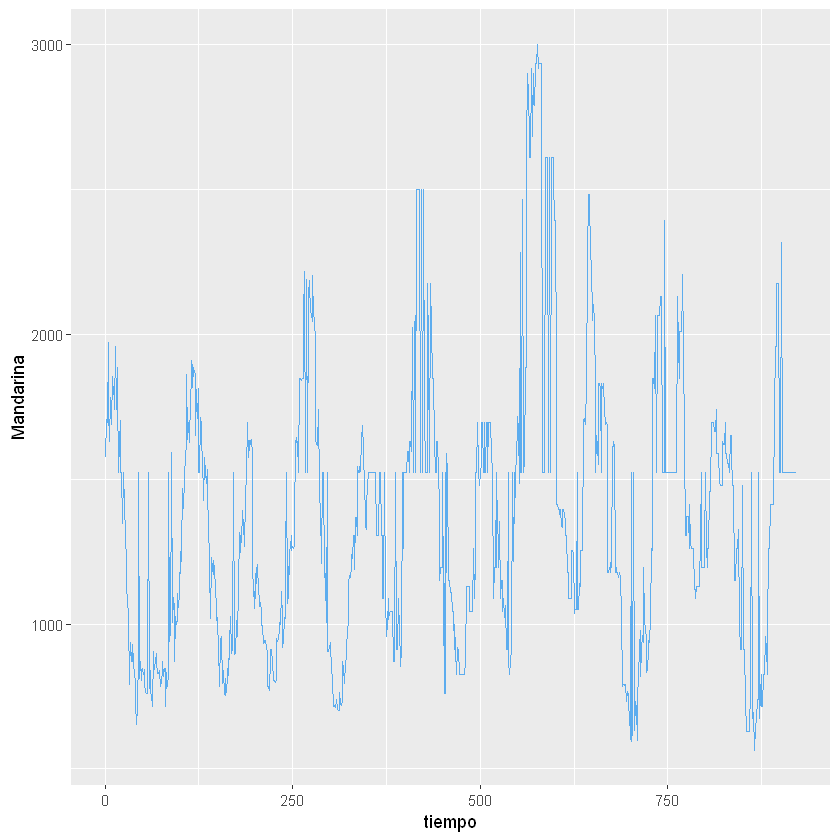

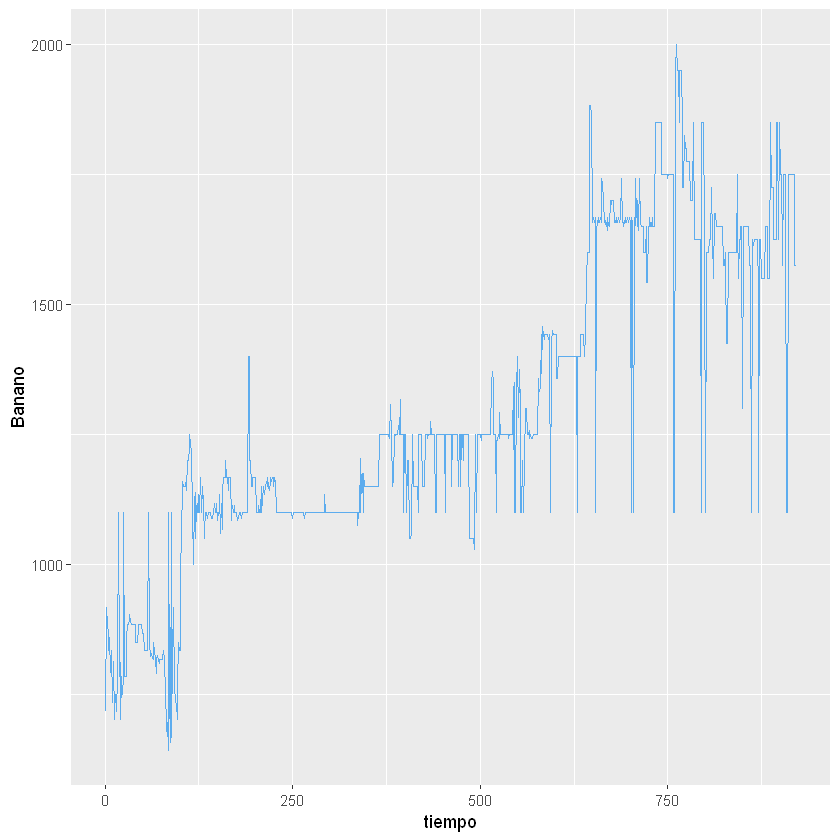

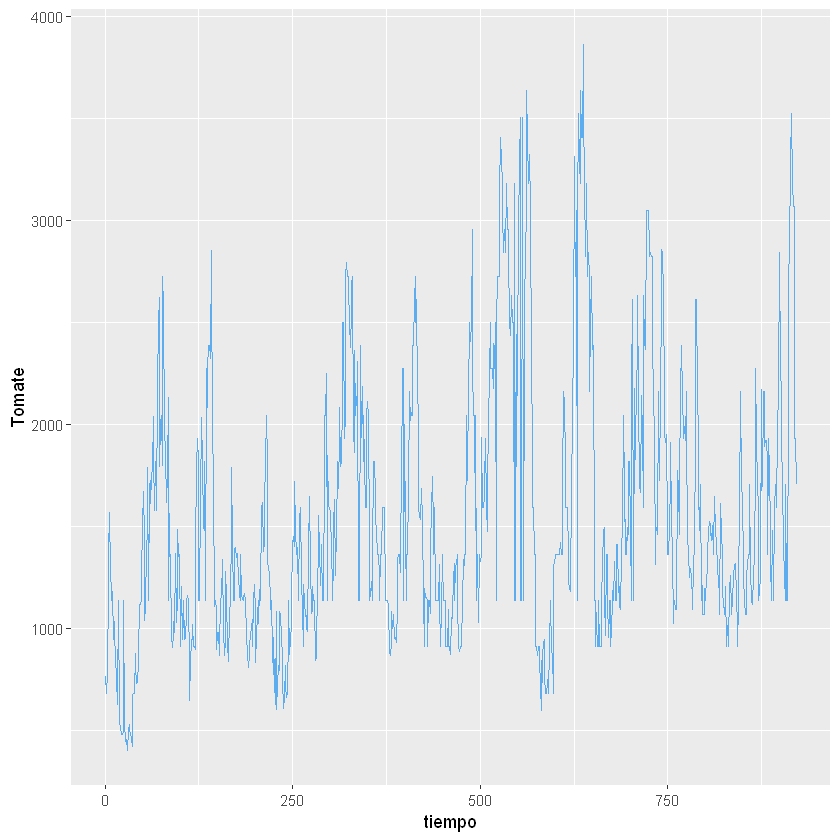

In [60]:
# Imputación basada en la moda

for (i in 2:9) {
 DATA4[,i]<-na.mean(DATA[,i], option = "mode")
 print(ggplot(data.frame(tiempo, DATA4[,i]), aes(x=tiempo))+geom_line(aes(y=DATA4[,i]), 
 col = "steelblue2")+ labs(y = producto[i]))         
}

El último tipo de imputación que es utilizado en los datos, es una imputación basada en el calculo de un modelo de regresión para ajustar los datos faltantes según el comportamiento histórico de cada producto.

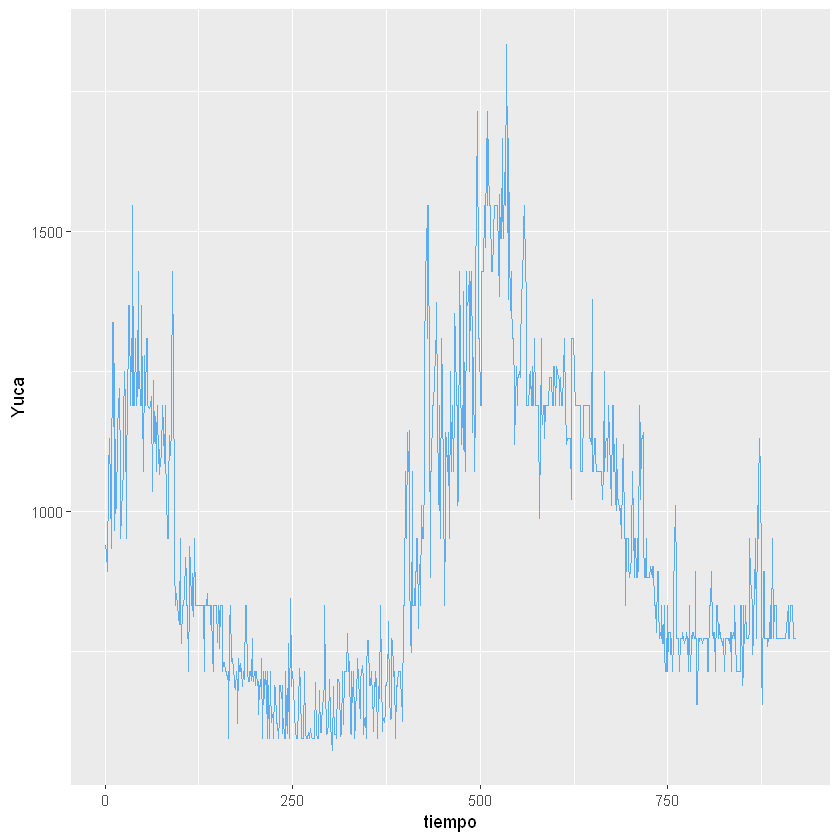

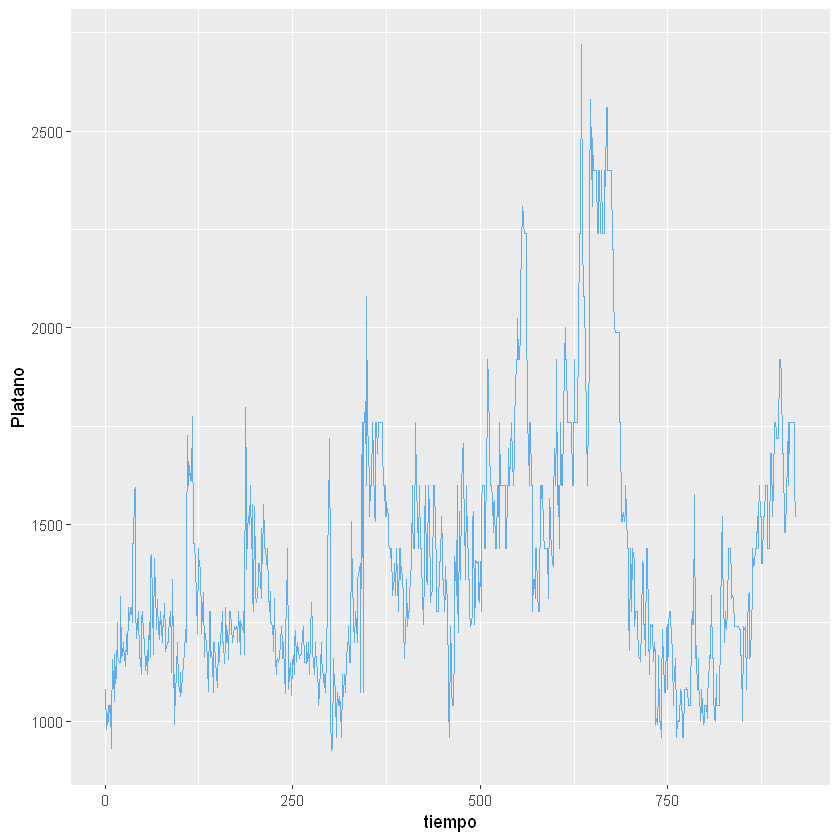

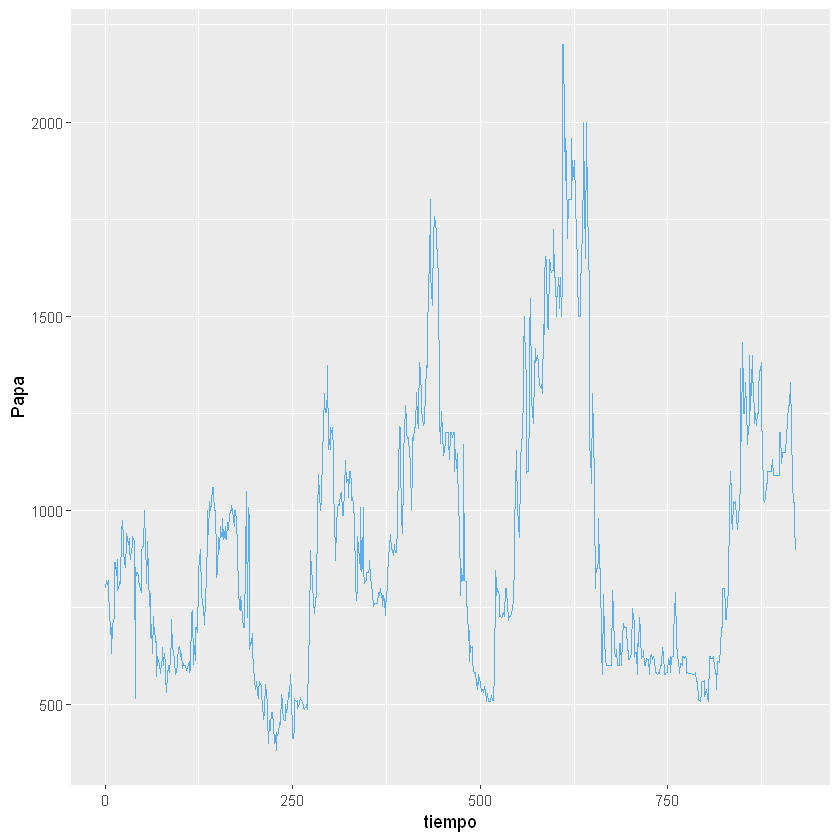

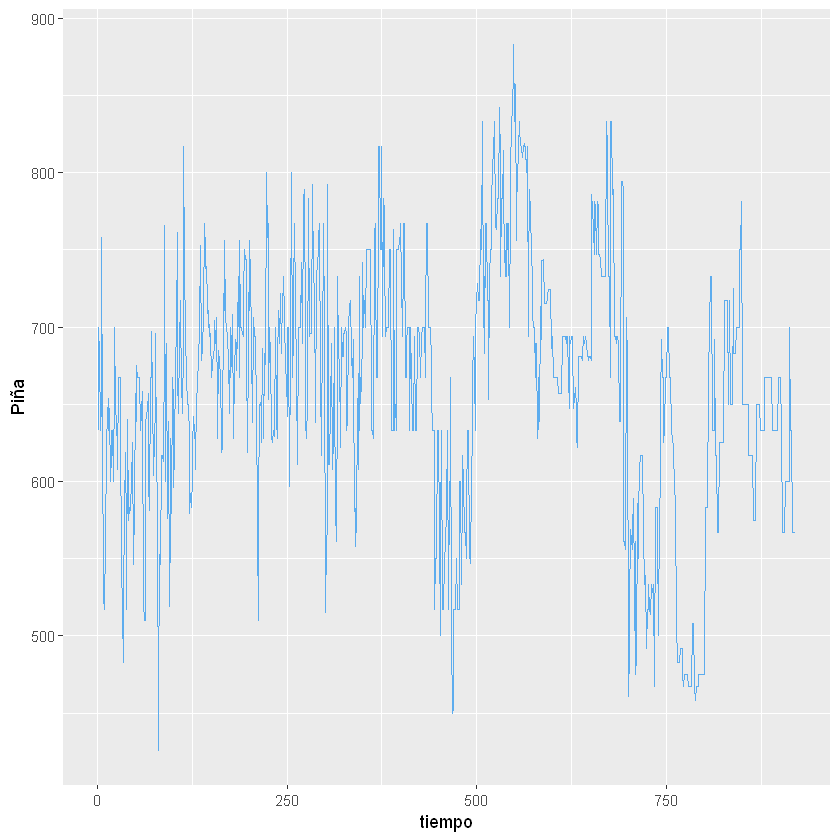

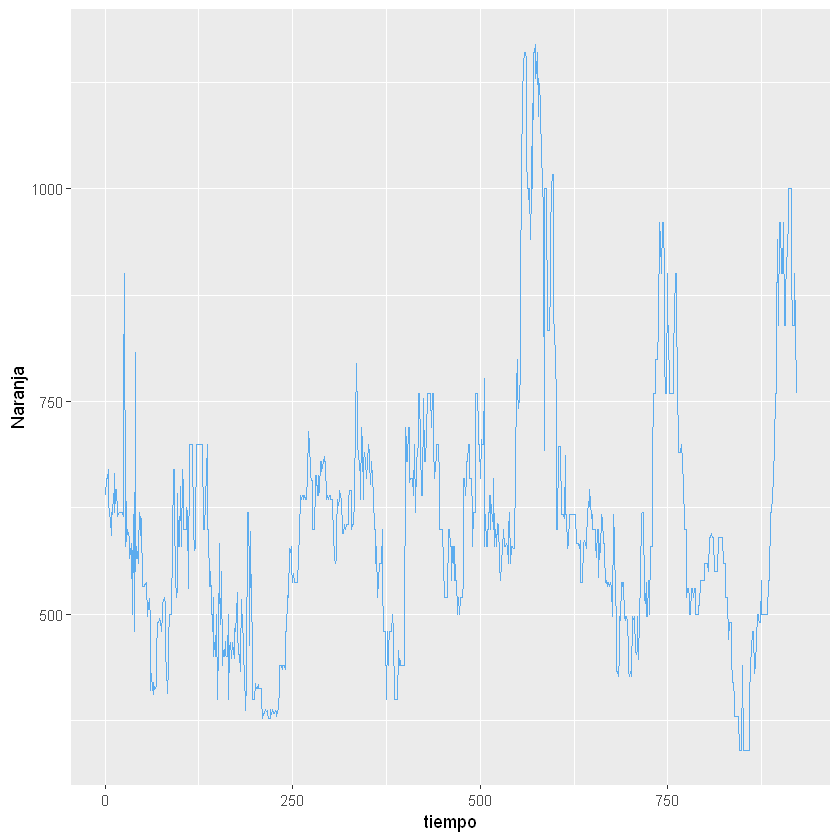

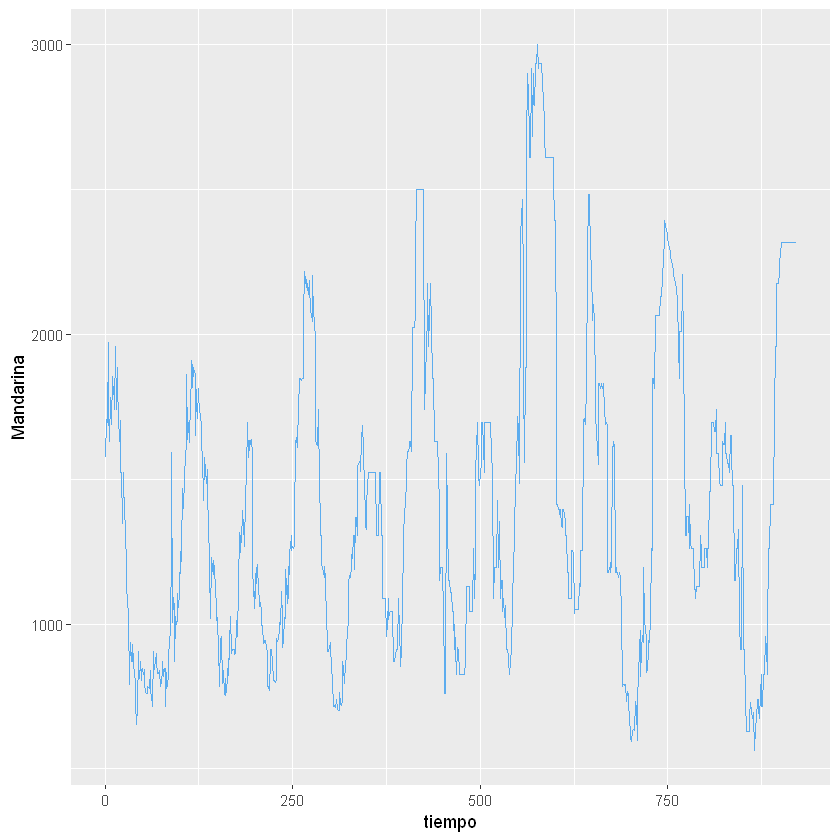

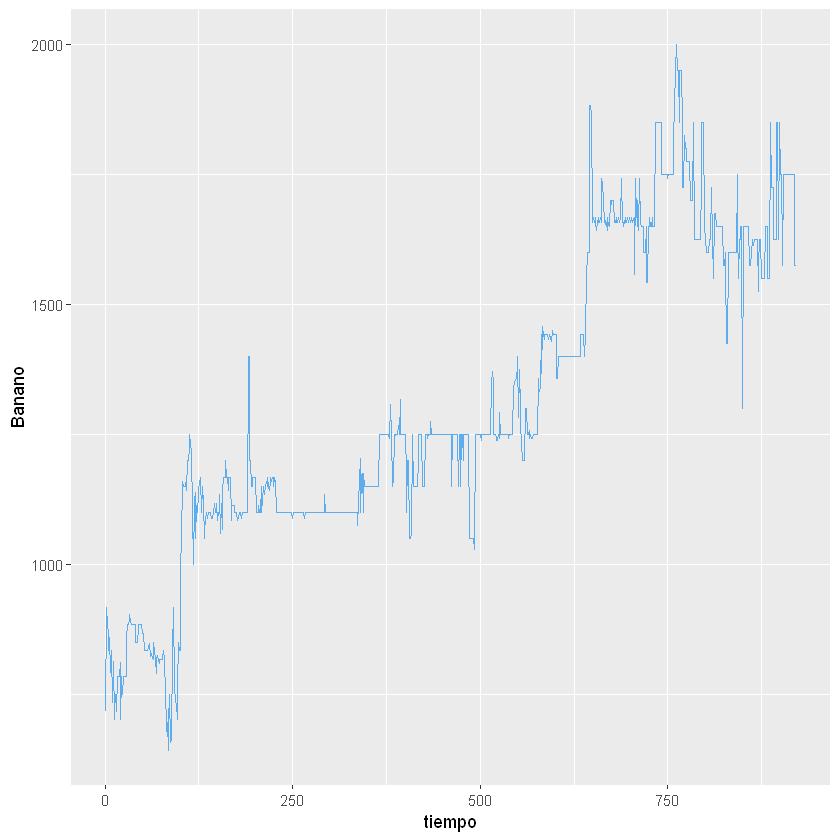

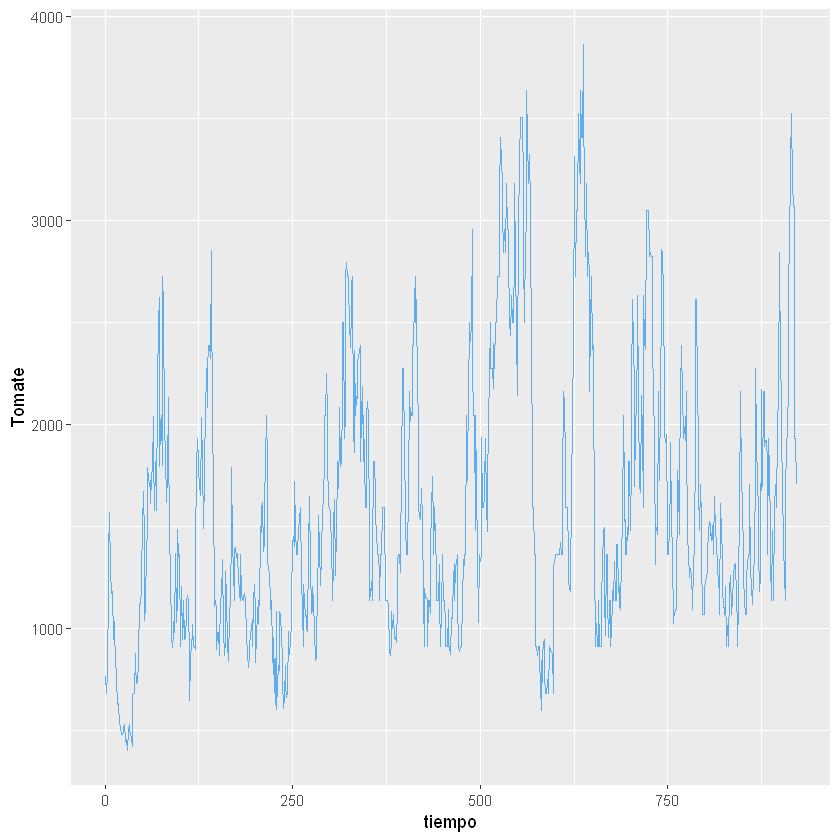

In [61]:
# Imputación basada en interpolación lineal

for (i in 2:9) {
 DATA5[,i]<-na.interpolation(DATA[,i], option = "linear")
 print(ggplot(data.frame(tiempo, DATA5[,i]), aes(x=tiempo))+geom_line(aes(y=DATA5[,i]), 
 col = "steelblue2")+ labs(y = producto[i]))         
}

Después de observar los diferentes tipos de imputación que se realizaron y con base en el análisis grafico se determina que la imputación mediante el promedio móvil ponderado es la que demuestra mayor semejanza al comportamiento que presentan los datos; lo que se presenta debido que al poseer una ventana móvil semiadaptativa constituida por los 5 valores posteriores y anteriores intenta mantener la variabilidad característica que poseen los datos en este periodo de tiempo.

Las imputaciones mediante medía, mediana y moda, aunque son una “estrategia sencilla y puede resultar intuitivamente satisfactoria, presenta un importante defecto y es que […] tiende a subestimar la variabilidad real de la muestra al sustituir los faltantes por valores centrales de la distribución” Gómez García (2006), y la imputación a través de regresión simple Medina & Galván (2007) sugieren no aplicarla “cuando el análisis secundario de datos involucra técnicas de análisis de covarianza o de correlación, ya que sobreestima la asociación entre variables”.

In [15]:
DATA<- data.frame(DATA[,c(1, 10)], DATA1[,2:9]) # nueva base de datos con imputación (k=5)
names(DATA) <- c("Fecha", "Dia", "Yuca", "Plátano", "Papa", "Piña", "Naranja", "Mandarina", "Banano", "Tomate")

## 1.4 Análisis del comportamiento de los precios

En la presente sección se abordan diferentes tipos de análisis aplicados a los datos con el objetivo de intentar entender un poco las caracteristicas que estos poseen.

### 1.4.3 Diagrama de bloques

Se desarrolla un diagrama de bloques con el objetivo de observar si los datos poseen alta variabilidad. Con base en este diagrama se puede enunciar que en la mayoría de los productos la mediana casi siempre se mantienes en el centro de los limites otorgados por el primer y tercer cuartil, lo que supone que este porcentaje de datos no posee gran variación con respecto a esta, ya que aunque crecieran y disminuyeran, no se alejaban, lo cual proporciona una visión general de la simetría de la distribución de los datos; no obstante, en algunos datos se presentan datos atípicos que se alejan del comportamiento normal.

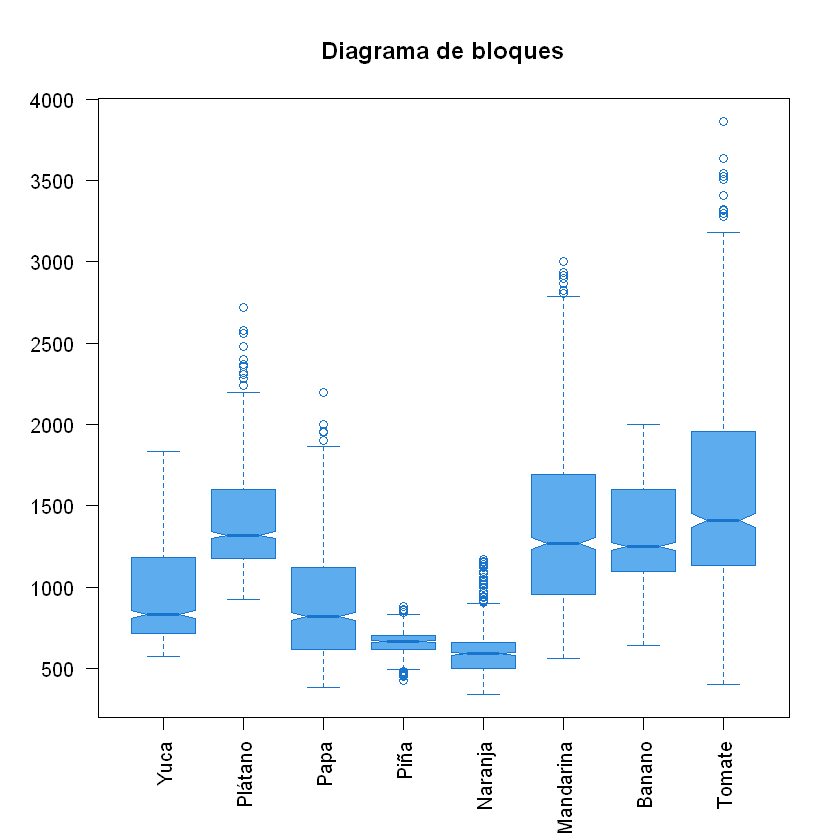

In [63]:
boxplot(DATA[,3:10], las = 2, col = "steelblue2",  
        medcol="dodgerblue3", whiskcol="dodgerblue3", 
        outcol="dodgerblue3", staplecol="dodgerblue3", 
        boxcol="dodgerblue3", notch=TRUE, 
        names=c("Yuca", "Plátano", "Papa", "Piña", "Naranja", "Mandarina", "Banano", "Tomate"), 
        main="Diagrama de bloques")

### 1.4.4 Diagrama de correlaciones

Se realiza una correlación entre los productos con el propósito de observar si existe una relación entre el cambio de precio de estos. La siguiente gráfica se puede interpretar de tal forma que entre mayor sea el radio del circulo y más intenso sea su color se presenta una correlación alta entre los productos, y baja de lo contrario; siendo el azul el color (cercano a 1) que representa una correlación serial positiva o directa y el rojo una correlación serial negativa o inversa (color cercano a -1).

[1] "Correlación del precios de los productos"


,Yuca,Plátano,Papa,Piña,Naranja,Mandarina,Banano,Tomate
Yuca,1.00000000,0.3772892,0.24711963,0.15352848,0.2562698,0.08680838,-0.08839482,0.21481658
Plátano,0.37728923,1.0000000,0.30106625,0.40036620,0.1769110,0.21095526,0.26936857,0.28040768
Papa,0.24711963,0.3010662,1.00000000,0.17521969,0.3169878,0.22317788,0.08318704,0.16959103
Piña,0.15352848,0.4003662,0.17521969,1.00000000,0.1255099,0.20213042,-0.14560688,0.09124279
Naranja,0.25626976,0.1769110,0.31698776,0.12550986,1.0000000,0.77700422,0.15521489,0.20594165
Mandarina,0.08680838,0.2109553,0.22317788,0.20213042,0.7770042,1.00000000,0.24540561,0.05235524
Banano,-0.08839482,0.2693686,0.08318704,-0.14560688,0.1552149,0.24540561,1.00000000,0.19600151
Tomate,0.21481658,0.2804077,0.16959103,0.09124279,0.2059416,0.05235524,0.19600151,1.00000000


[1] "Mapa de calor"


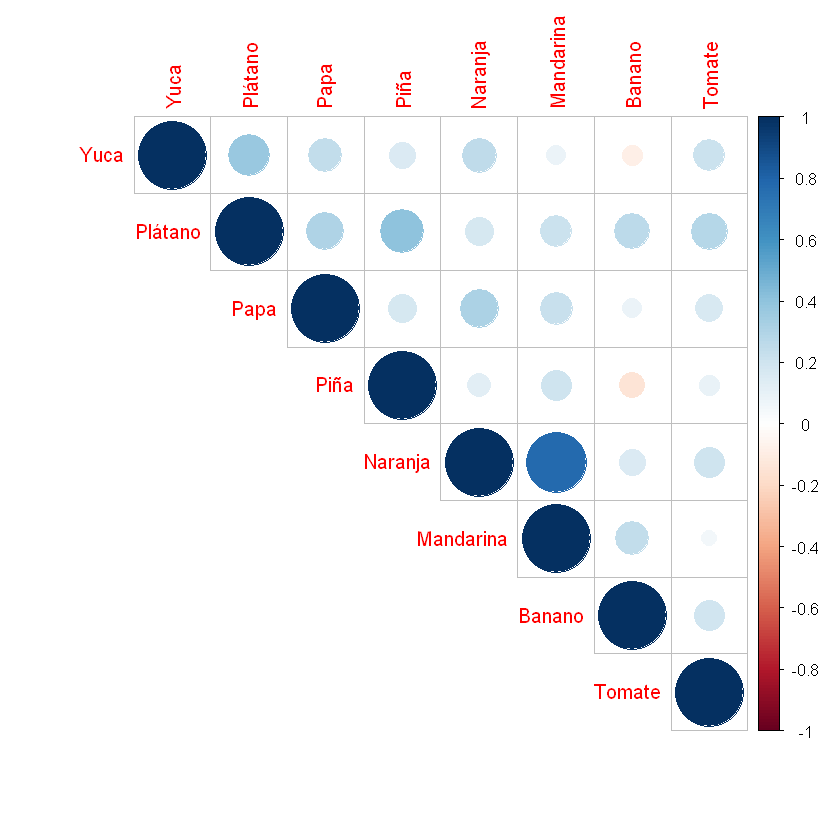

In [64]:
print("Correlación del precios de los productos")
cor(DATA[,3:10])
print("Mapa de calor")
corrplot(cor(DATA[,3:10]), method = "circle", type = "upper")

Después de realizado el gráfico de correlación de los precios de los productos con el propósito de determinar si los comportamientos de un par de productos se ven afectados simultáneamente, se encuentra que solo la mandarina y la naranja (cítricos) poseen correlación positiva fuerte; no obstante, esto no quiere decir que un producto afecte al otro en determinada magnitud, para concluir esto se deben desarrollar estudios mas especializados. La anterior gráfica permite para los cítricos que pueden existir fenómenos en el mercado que afectan a los precios de estos simultáneamente. 

Las correlaciones se clasifican según la siguiente escala:

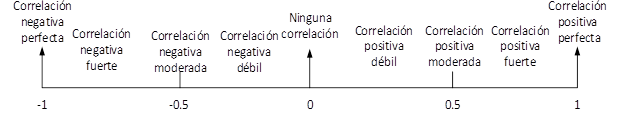

Clasficación de las correlaciones de los precios de los productos:

Producto 1| Producto 2	|Correlación	|Categoría	|Producto 1	|Producto 2	|Correlación	|Categoría
-- | -- | -- | -- | -- | -- | -- | -- |
Yuca	  | Plátano	    |0.38	        |+ débil	|Papa	    |Naranja	|0.31	        |+ débil
Yuca	  | Papa	    |0.25	        |+ débil	|Papa	    |Mandarina	|0.21	        |+ débil
Yuca	  | Piña	    |0.15	        |+ débil	|Papa	    |Banano	    |0.08	        |ninguna
Yuca	  | Naranja	    |0.26	        |+ débil	|Papa	    |Tomate	    |0.17	        |+ débil
Yuca	  | Mandarina	|0.09	        |+ débil	|Piña	    |Naranja	|0.13	        |+ débil
Yuca	  | Banano	    |-0.08	        |- débil	|Piña	    |Mandarina	|0.20	        |+ débil
Yuca	  | Tomate	    |0.21	        |+ débil	|Piña	    |Banano	    |-0.15	        |- débil
Plátano   | Papa	    |0.30	        |+ débil	|Piña	    |Tomate	    |0.09	        |+ débil
Plátano   |	Piña	    |0.40	        |+ débil	|Naranja	|Mandarina	|0.77	        |+ fuerte
Plátano   |	Naranja	    |0.18	        |+ débil	|Naranja	|Banano	    |0.15	        |+ débil
Plátano   |	Mandarina	|0.21	        |+ débil	|Naranja	|Tomate	    |0.20	        |+ débil
Plátano   |	Banano	    |0.27	        |+ débil	|Mandarina	|Banano	    |0.24	        |+ débil
Plátano   |	Tomate	    |0.28	        |+ débil	|Mandarina	|Tomate	    |0.05	        |ninguna
Papa	  | Piña	    |0.17	        |+ débil	|Banano	    |Tomate	    |0.20	        |+ débil

Con base en la tabla anterior se puede observar que la correlación existente entre los precios de los productos se encuentra alrededor del 0.25 positiva y directa, convirtiéndolos en productos cuyo cambio de precio en el mercado no se ven afectados por los otros según la escala, no obstante, permite percibir una determinada relación, así sea mínima; también se observan varias correlaciones cercanas a cero y negativas como el caso de productos como el banano con la piña y la yuca.

### 1.4.4 Gráficas promedio - varianza

El análisis del promedio y varianza para el precio del banano se presenta a continuación, con el fin de identificar la relación existente entre los cambios de la varianza, el promedio de los precios y observar a través de un análisis gráfico cómo se comporta la variabilidad de los datos. El eje "x" de las gráficas representa los años y el eje "y" los datos de precios, promedio y varianza normalizados; la normalización se desarrollo, debido que los precios presentan valores positivamente grandes, lo cual no permitiría con el uso del valor base una presentación clara de la variabilidad en el gráfico.

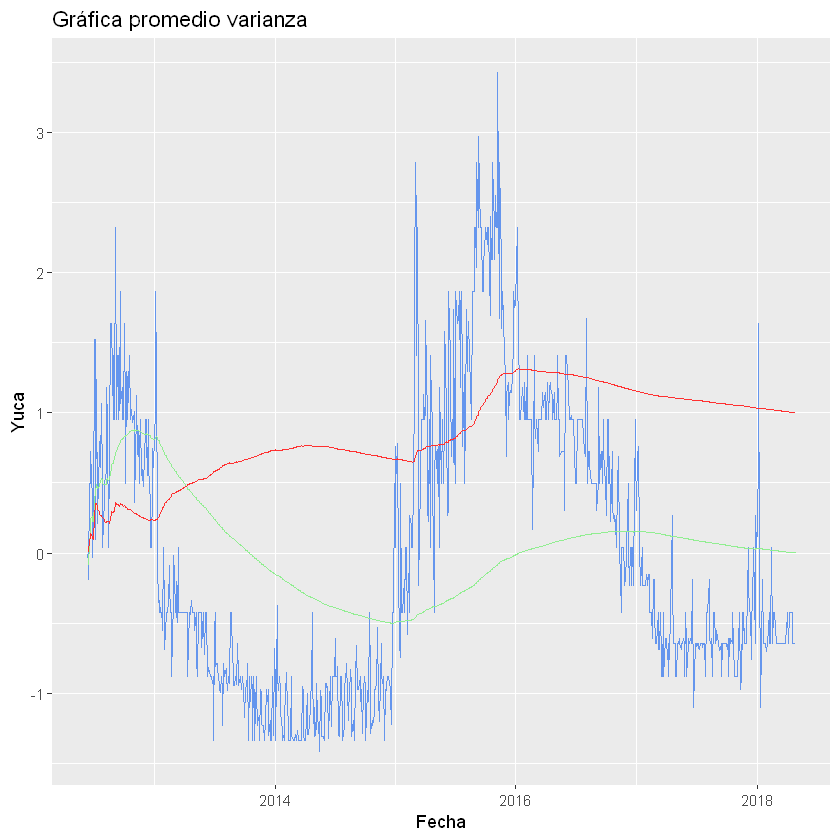

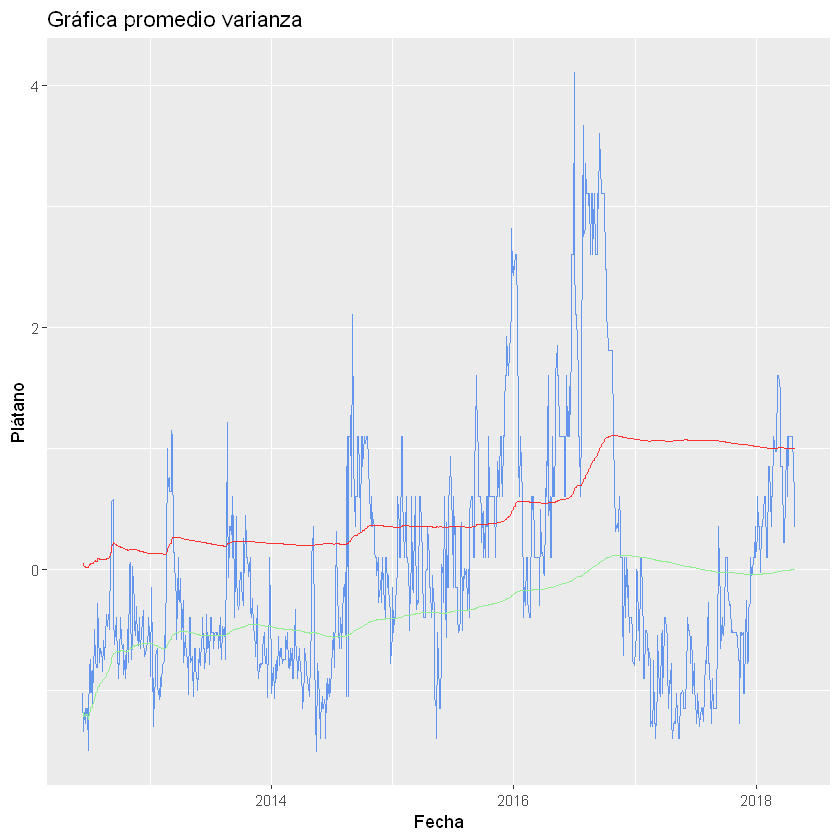

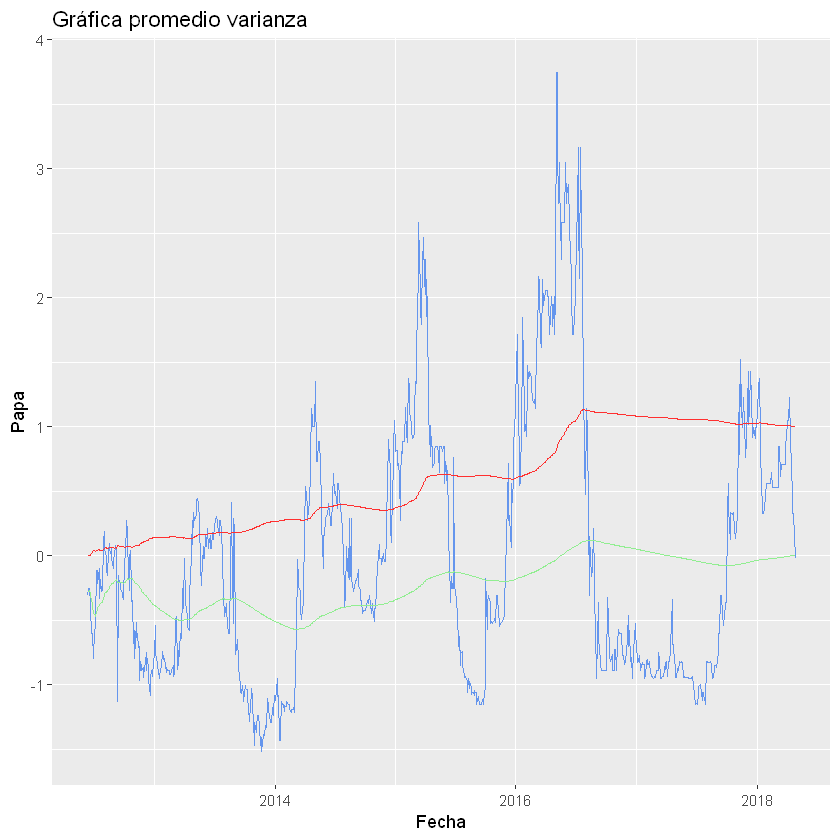

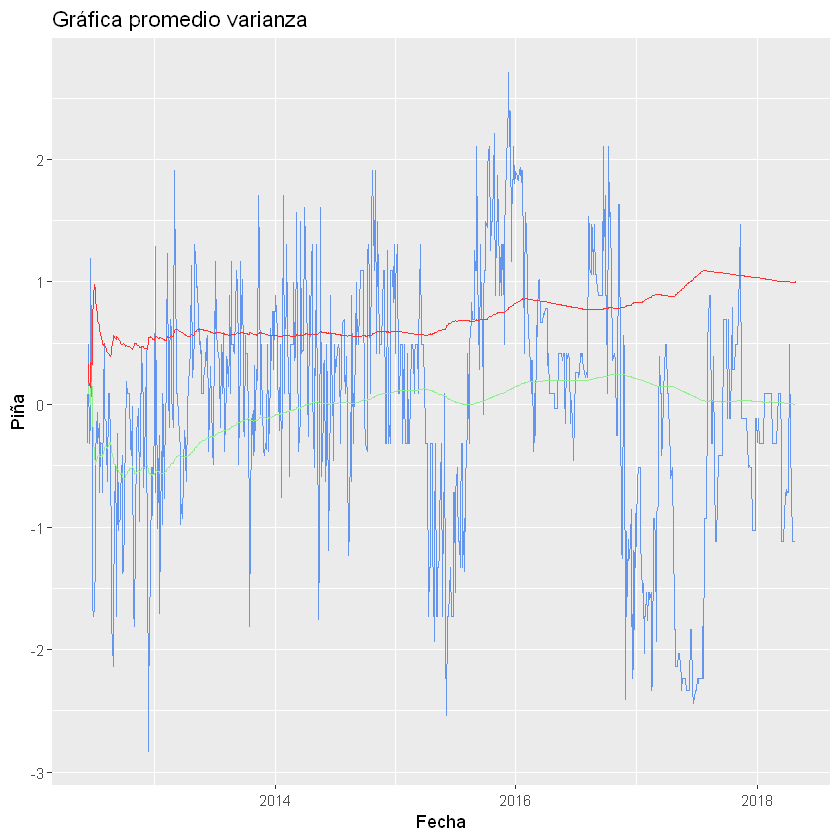

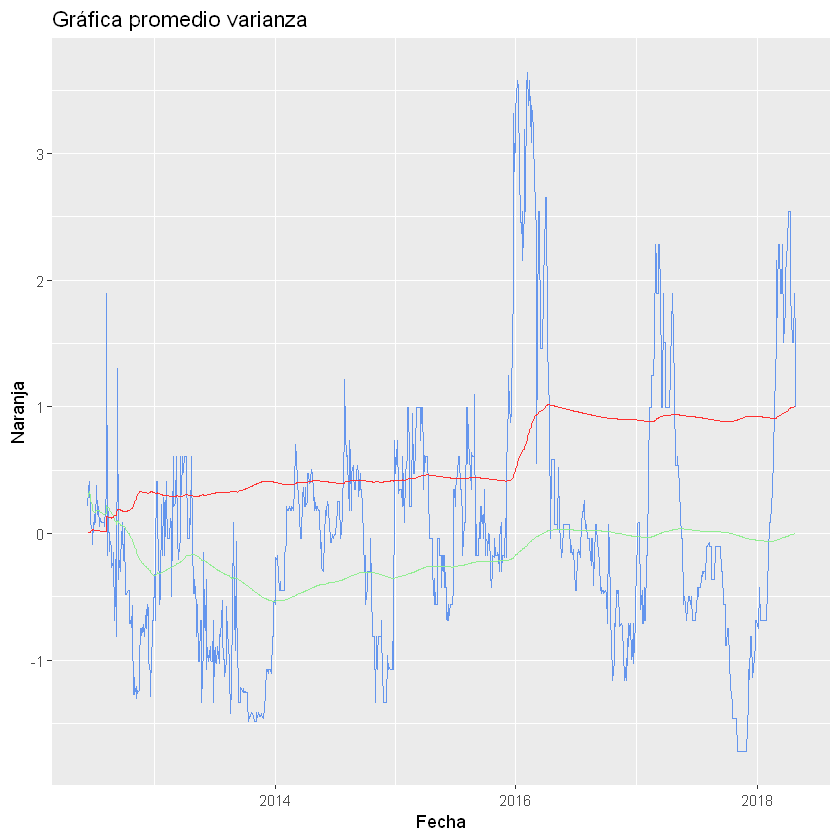

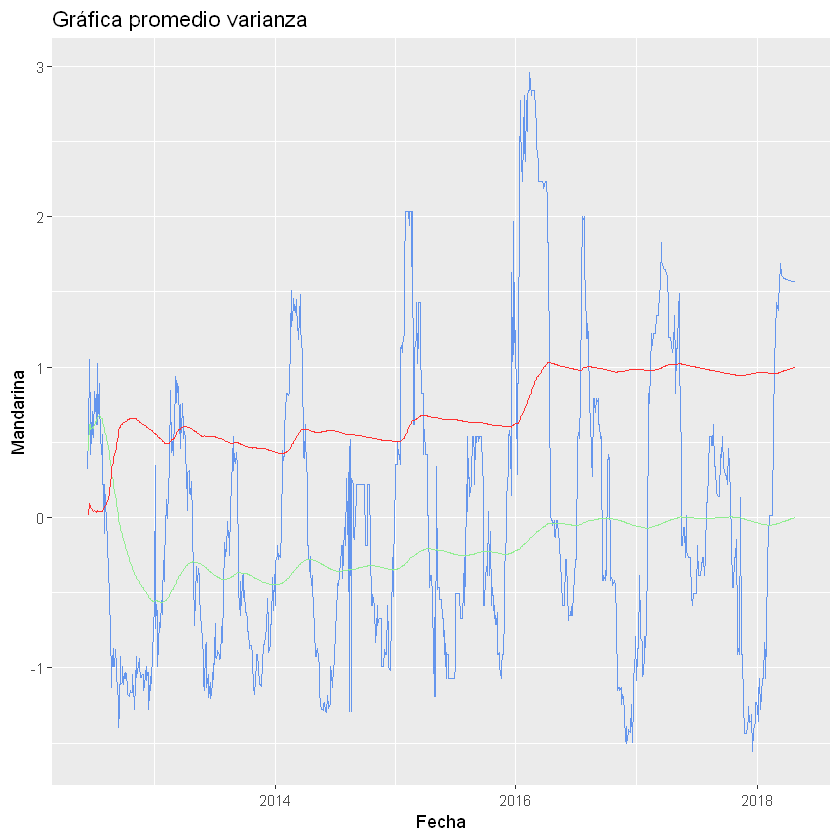

ERROR: Error in `[.data.frame`(data, 2 + j): undefined columns selected


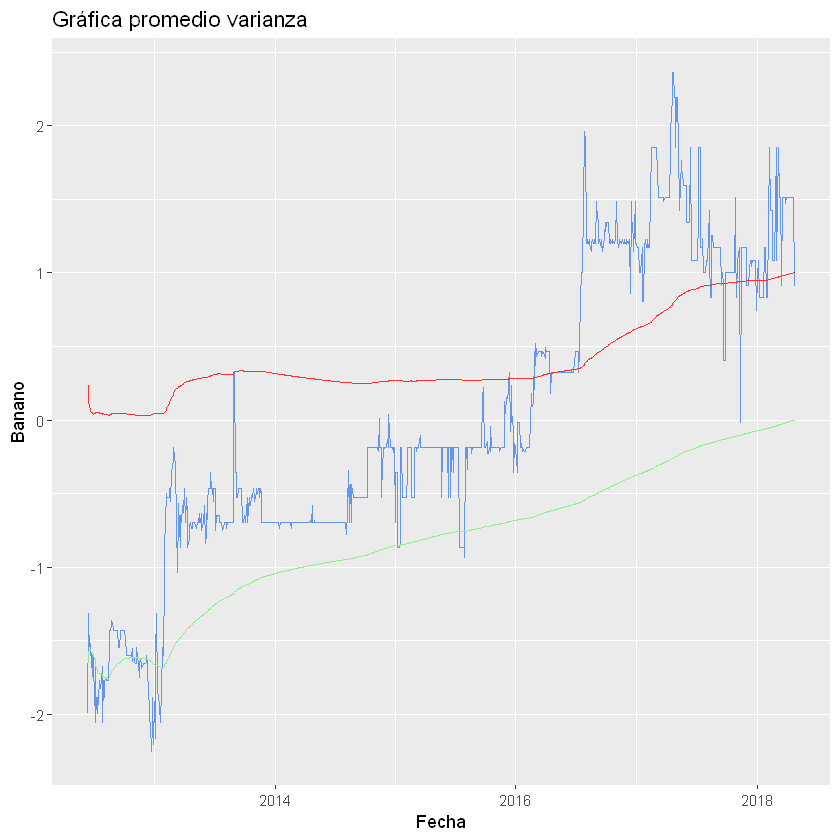

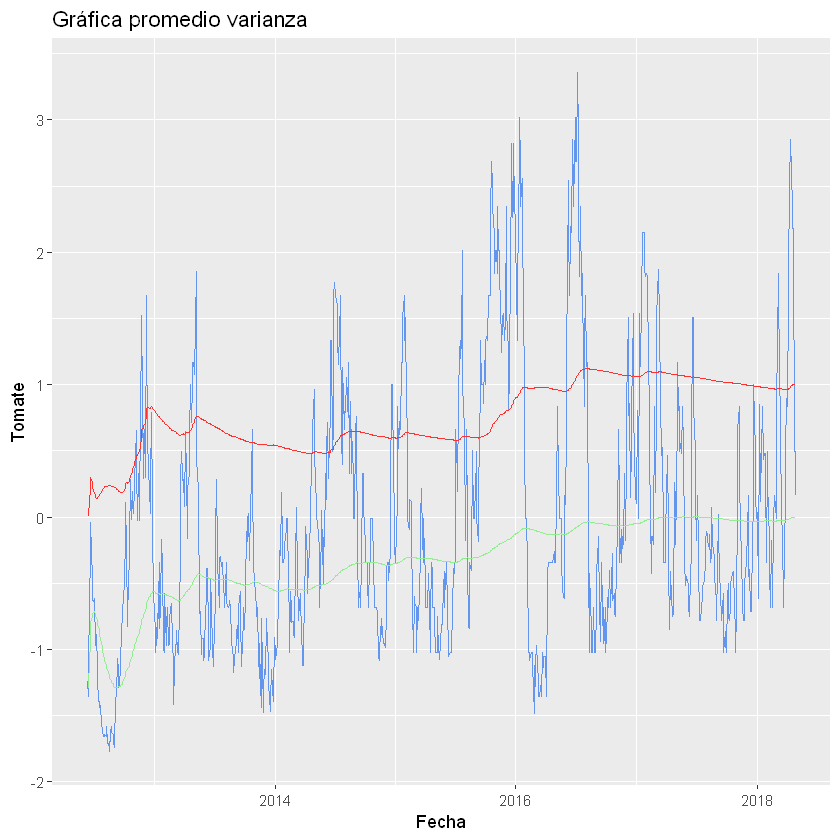

In [65]:
data= data.frame(read_excel("Datos.xlsx")) # base datos modificado en excel con el valor real, el promedio y la varianza normalizada
options(warn=-1)

# bucle que grafica el promedio, el valor base y la varianza de cada producto

j<- 0
for(i in 2:length(data)) {
  print(ggplot(data, aes(x = data[, 1])) + ggtitle("Gráfica promedio varianza")+ ylab(names(data[2+j]))+
  xlab(names(data[1])) +
  geom_line(aes(y = data[, 2+j]), colour="cornflowerblue") + 
  geom_line(aes(y = data[, 2+1+j]), colour = "lightgreen")+
  geom_line(aes(y = data[, 2+2+j]), colour = "firebrick1") )
j<-j+3
}

### 1.4.5 Gráficas por dia (todos los años)

Se presenta un desglose de los precios de los productos por día (martes, jueves y viernes) de tal forma que se pueda apreciar con mayor claridad los cambios que se presentan según el día con el fin de determinar patrones y características según el día.
En la siguiente figura se puede observar que en términos generales los precios mantienen un comportamiento que posee poca variación con respecto al día a través del tiempo, exhibiendo diferencias en determinados periodos, pudiéndose inferir que los precios no se ven afectados por el día en el cual se generó el dato.

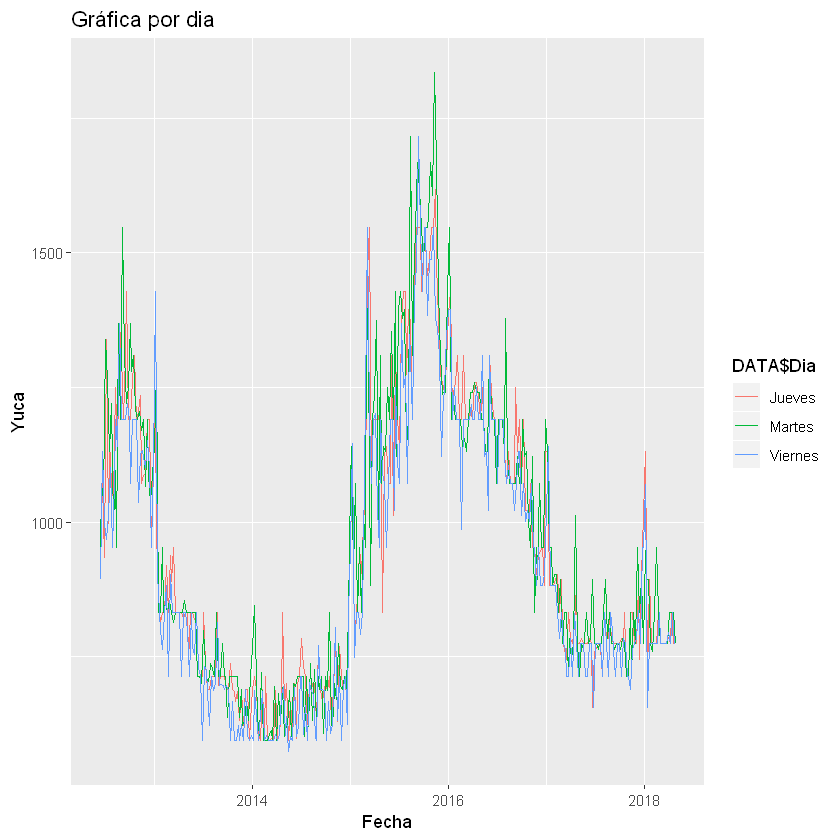

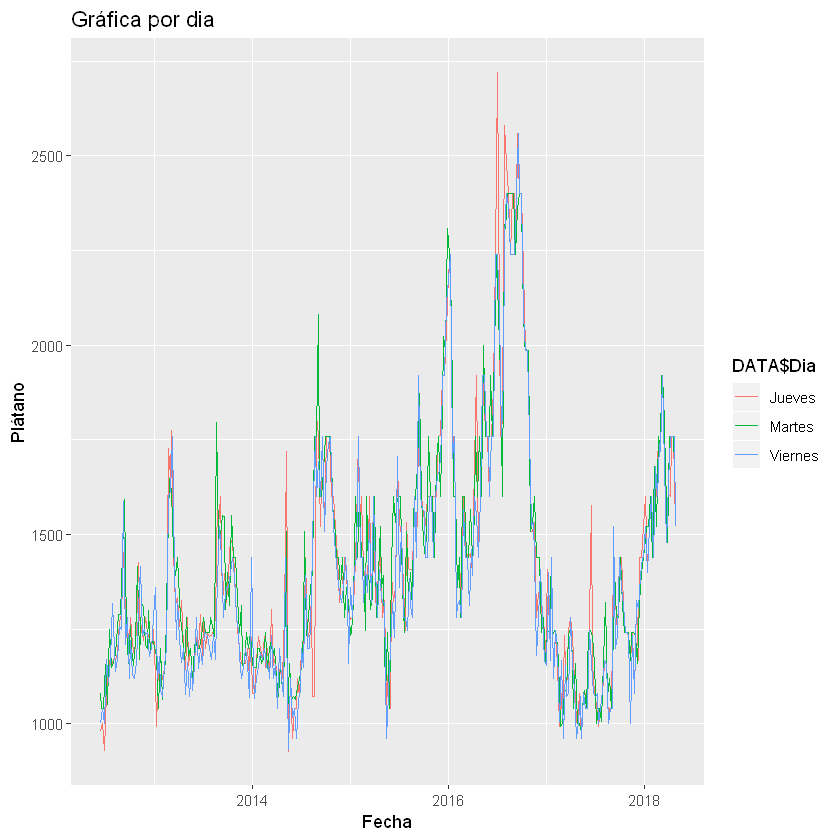

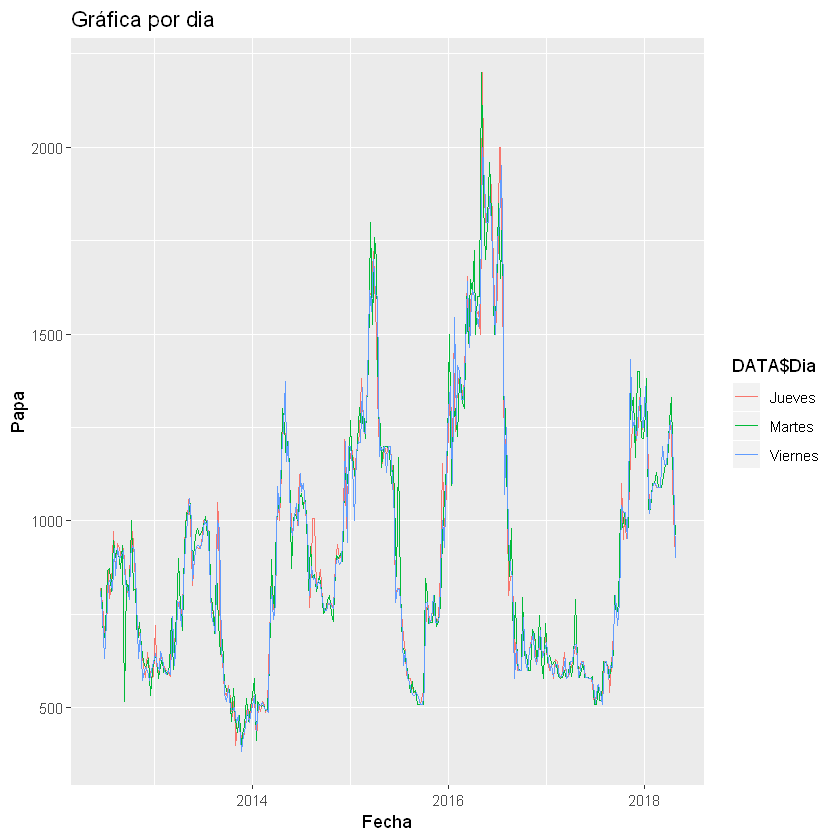

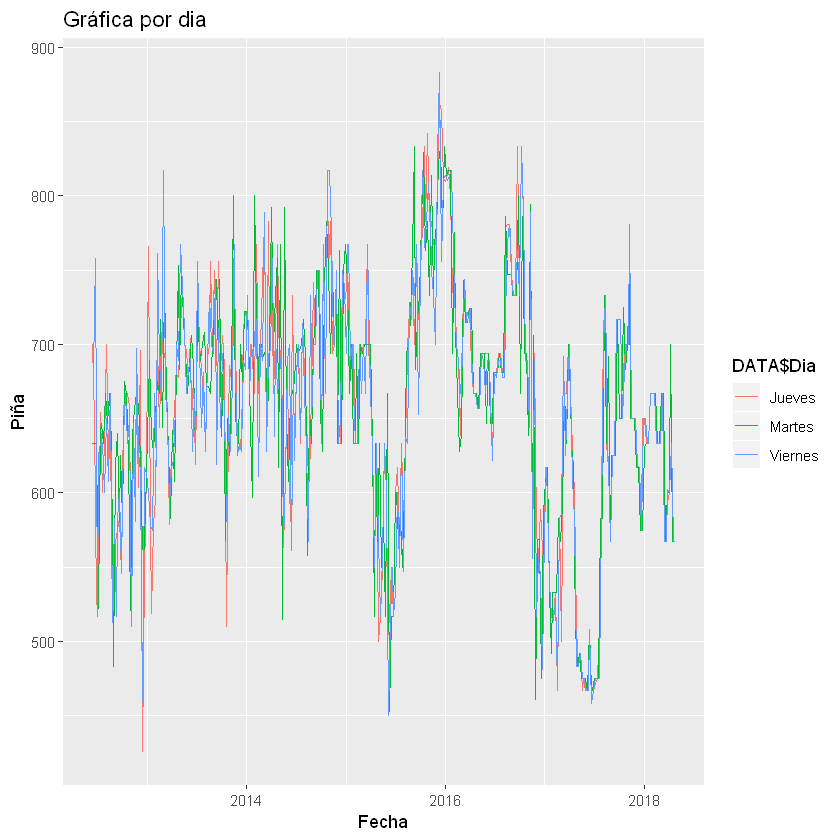

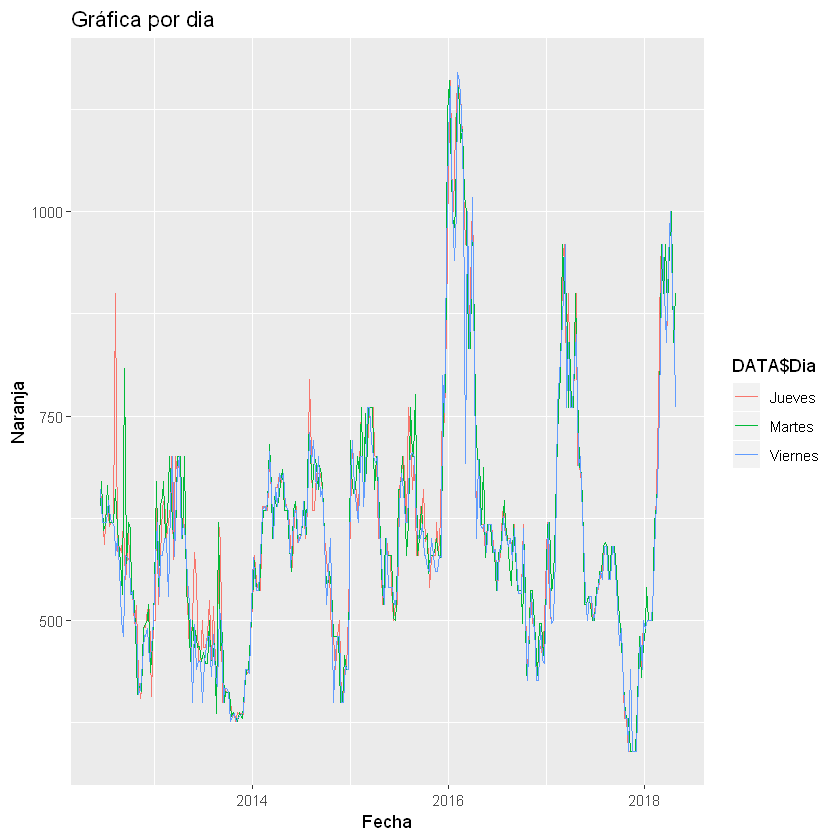

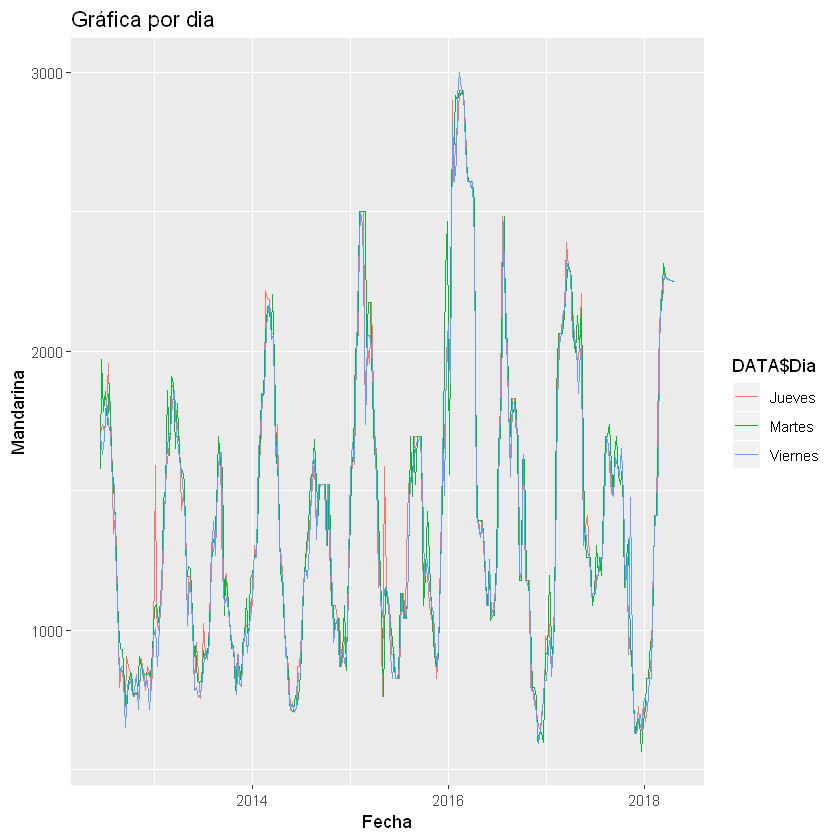

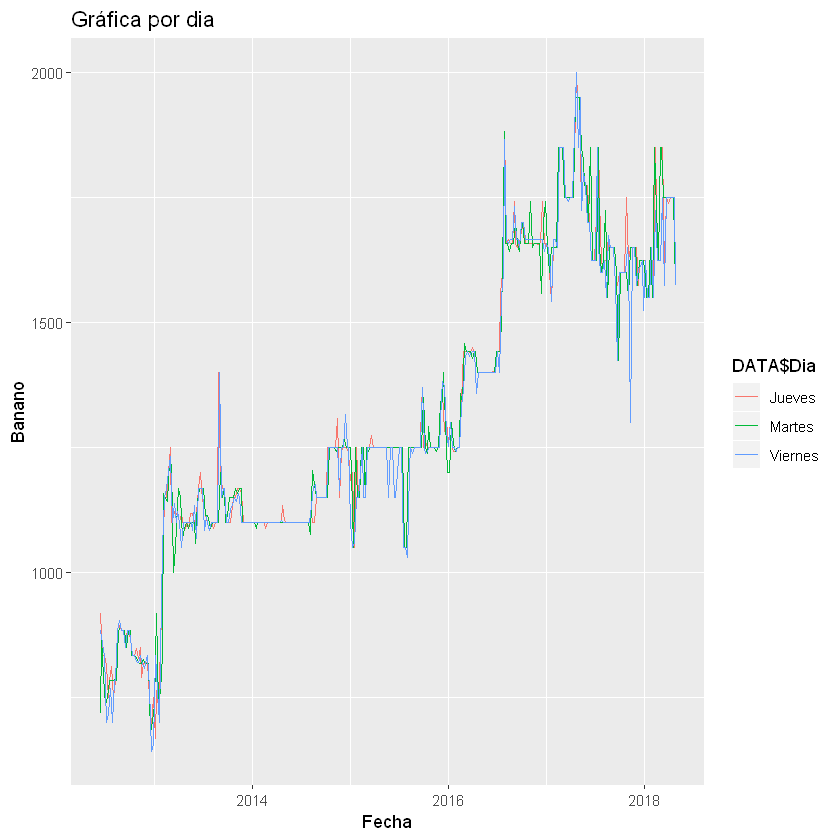

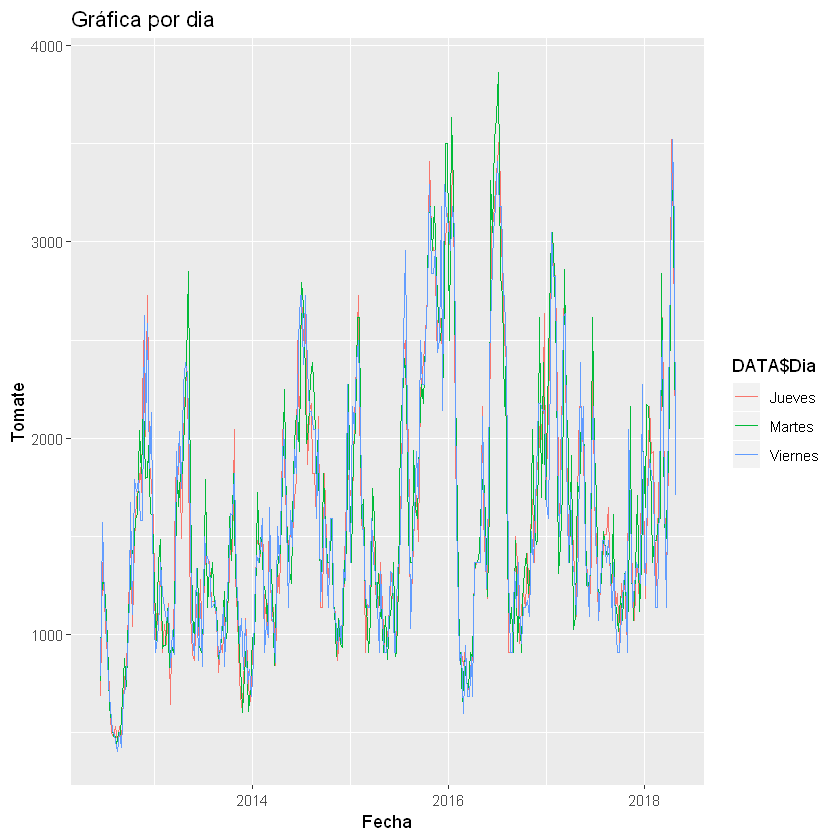

In [66]:
# bucle que grafica simultaneamente el valor base de los precios según el dia

for (i in 3:10) {
print(ggplot()+ggtitle("Gráfica por dia")+ ylab(names(DATA[i]))+ xlab(names(DATA[1]))
      + geom_line(data = DATA[, c(1, i)], aes(x =DATA[, 1] , y = DATA[, i], group = DATA$Dia, colour=DATA$Dia)))
}

### 1.4.6 Gráficas por año (todos los días)

A continuación, se realiza un análisis del comportamiento de los precios de cada uno de los productos durante cada año, haciendo una comparación entre cada uno de ellos con el fin de identificar si existen similitudes o diferencias de un año a otro. Cada color en cada gráfica representa un año diferente pudiendo de esta forma observar en ellas los cambios que presentan en el transcurso de periodo en estudio. Estas gráficas permiten observar si existen efectos en el mercado que repercutan en el periódicamente en las series temporales.

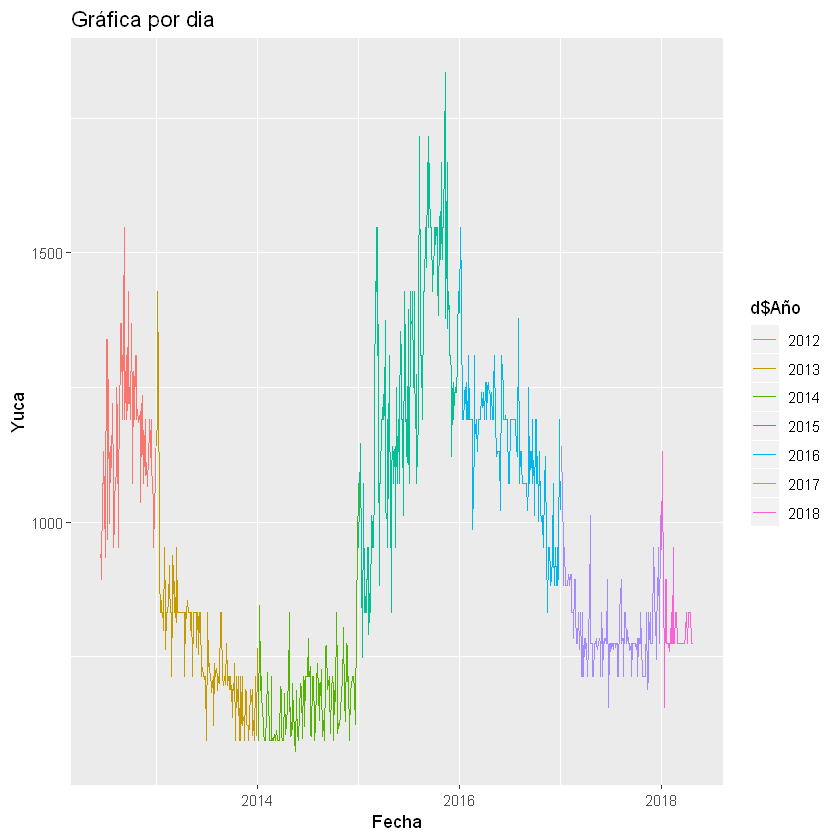

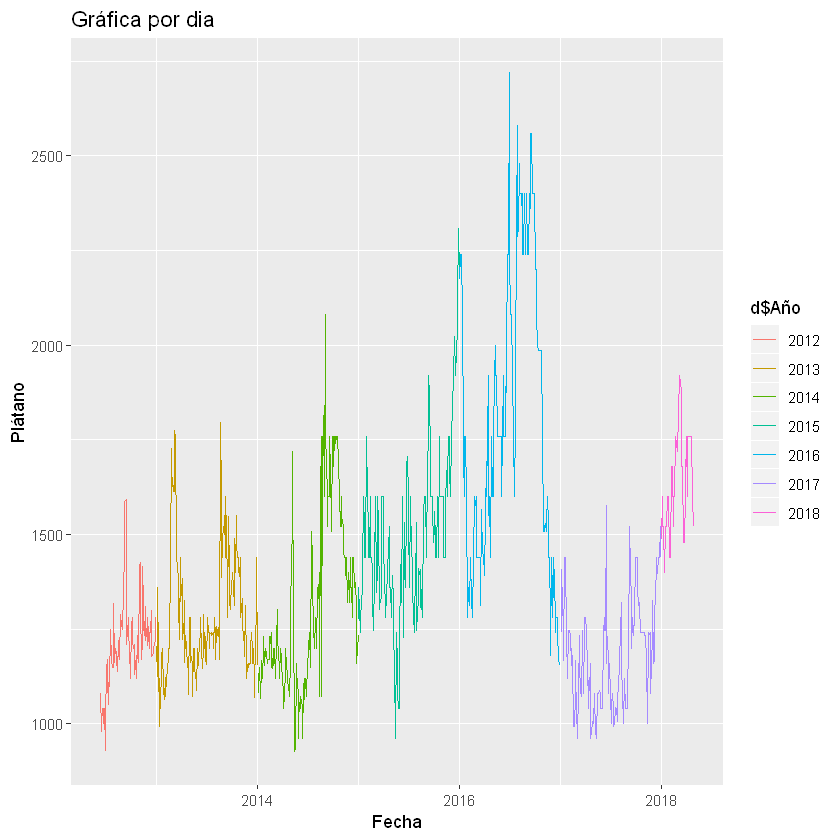

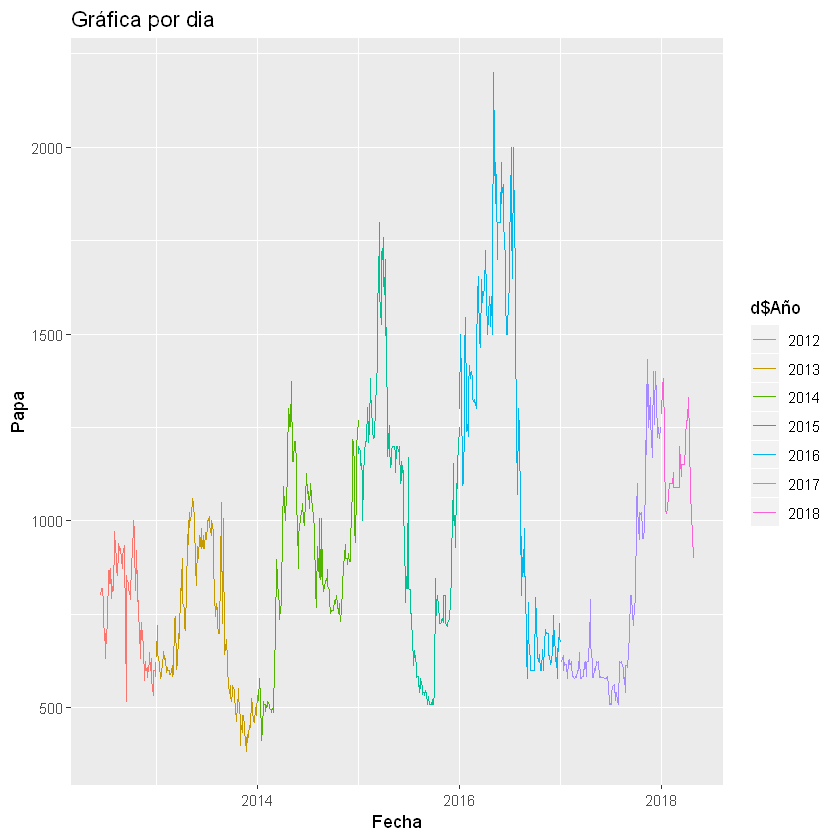

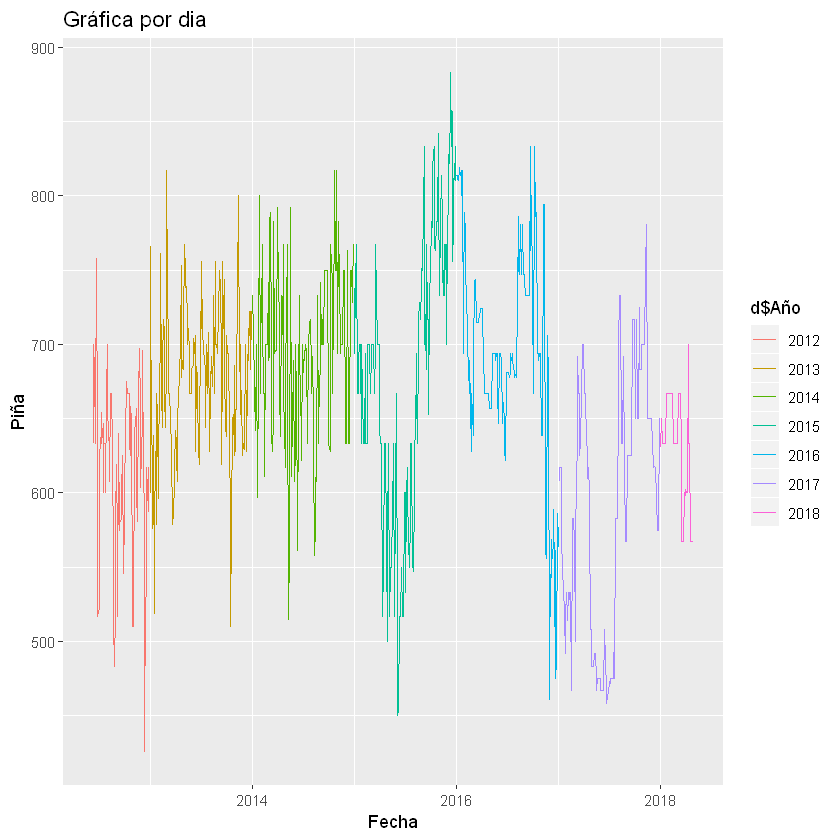

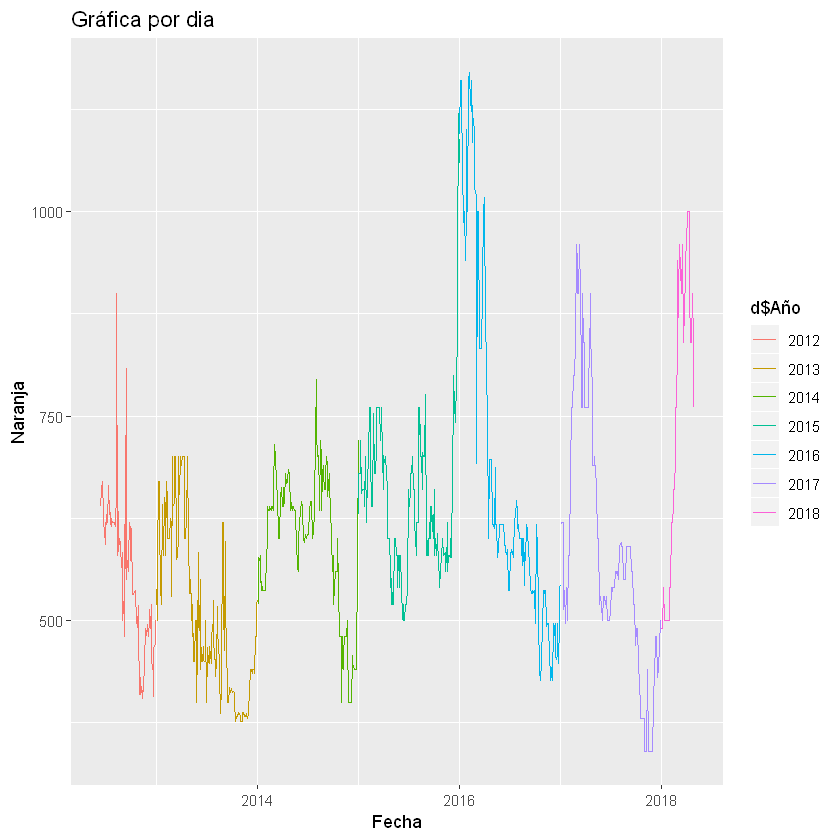

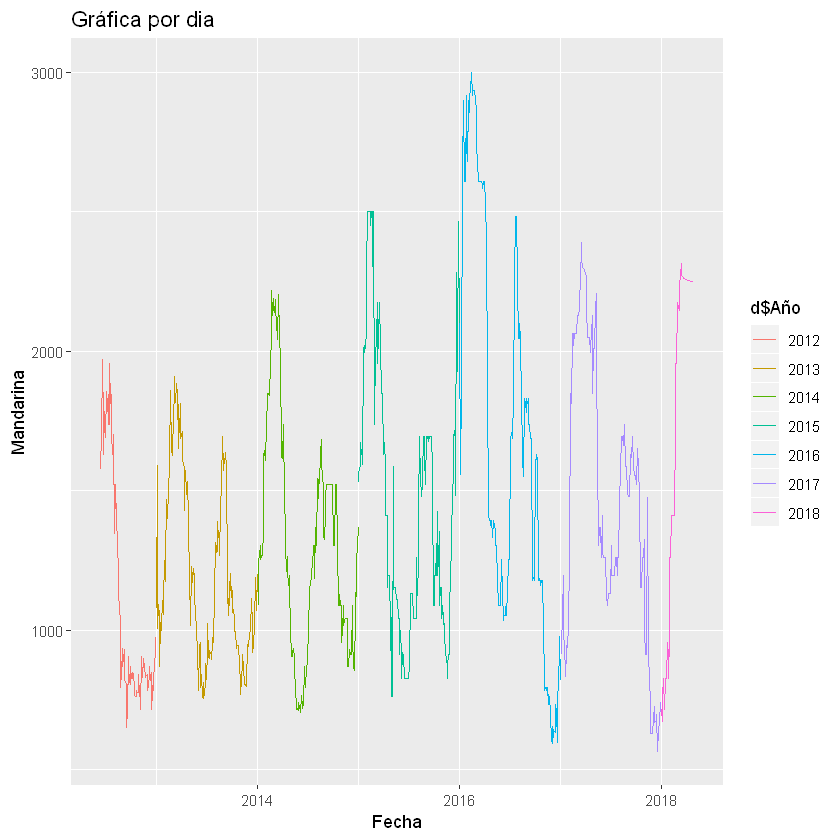

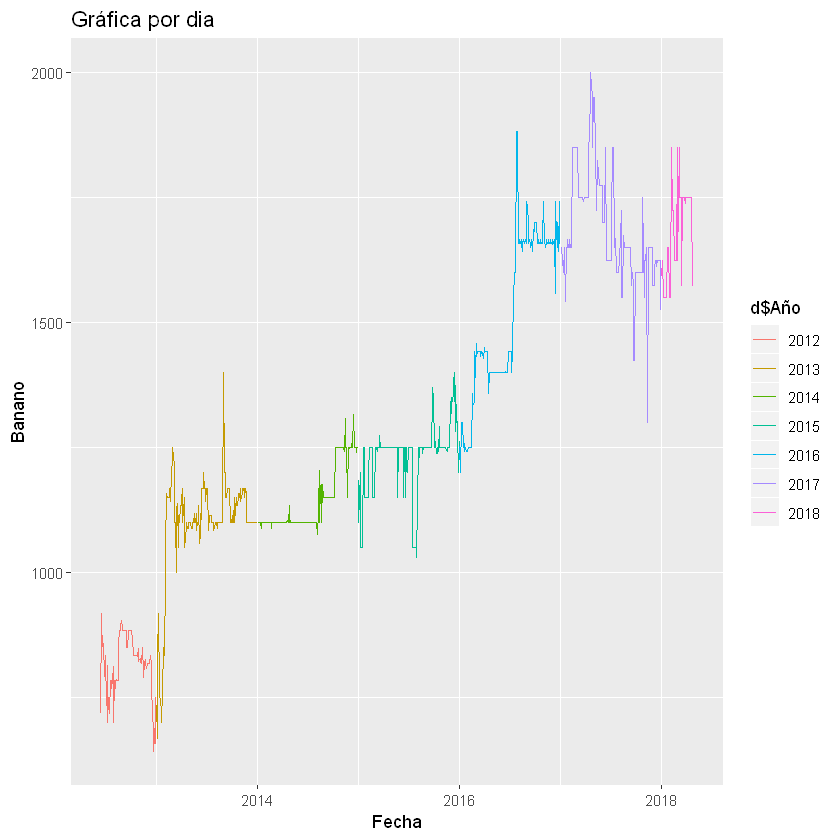

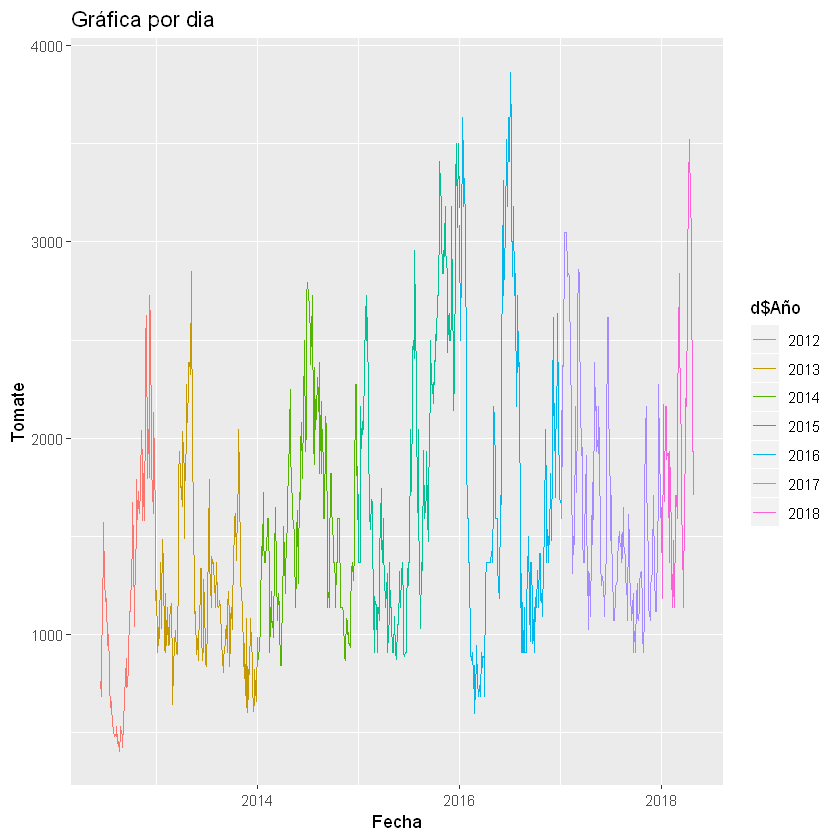

In [67]:
# bucle que grafica el valor base de los precios diferenciando cada año

d<-data.frame(as.vector(format(DATA$Fecha, "%Y")), DATA)  # base de datos donde se extrae el año de la columna fecha para graficar
# se renombran las columnas o variables
names(d)<-c("Año","Fecha", "Dia", "Yuca", "Plátano", "Papa", "Piña", "Naranja", "Mandarina", "Banano", "Tomate")
for (i in 4:11) {
print(ggplot()+ggtitle("Gráfica por dia")+ ylab(names(d[i]))+ xlab(names(DATA[1]))
      + geom_line(data = d[, c(1, i)], aes(x = d[, 2], y = d[, i], group = d$Año, colour=d$Año)))
}

## 1.5 Análisis de estacionariedad y aleatoriedad de los datos

El análisis de estacionariedad se desarrolla con el objetivo de cumplir con los requisitos exigidos por la metodología ARIMA (Box-Jenkins), la cual argumenta que a un conjunto de datos solo se le puede ajustar un modelo ARIMA si se cumple con la condición de estacionariedad, de lo contrario el conjunto de datos debe ser transformada antes del ajuste. Para este análisis se desarrollan tres pruebas y un análisis gráfico.

### 1.5.1 Prueba de Raiz Unitaria

La prueba estadística de raíz unitaria evalúa la hipótesis nula de aleatoriedad la cual consiste en determinar si un proceso presenta un comportamiento de raíz unitaria o en cuyo defecto un proceso integrado I(1).

#### 1.5.1.1 Prueba de raiz unitaria con deriva y tendencia

$$∆Yt = β1 + β2t + δY(t-1) + ut$$

La primera prueba consiste en determinar si los datos presentan un proceso de raíz unitaria con deriva y tendencia (como se observa en la anterior ecuación), donde el valor $β1$ representa el intercepto o deriva del proceso, $β2$ la tendencia temporal del proceso,  $δ$ la raíz del proceso, $Y(t-1)$ la variable rezagada, $u$ un valor de error o ruido blanco (que se distribuye normalmente con media=0 y varianza=1) asociado al modelo  y $t$ es el tiempo medido de forma cronológica.

#### 1.5.1.2 Prueba de raiz unitaria con deriva y sin tendencia

$$∆Yt = β1 + δY(t-1) + ut$$

La segunda prueba consiste en comprobar si el conjunto de datos presentan un proceso de raíz unitaria con deriva pero sin tendencia (como se observa en la anterior ecuación), donde el valor $ß1$ representa el intercepto o deriva del proceso, $δ$ representa la raíz del proceso, $Y(t-1)$ la variable rezagada, $u$ un valor de error o ruido blanco asociado al modelo y $t$ es el tiempo medido de forma cronológica.

#### 1.5.1.3 Prueba de raiz unitaria sin deriva y sin tendencia

$$∆Yt = δY(t-1) + ut$$

La tercera prueba consiste en comprobar si los datos presentan un proceso de raíz unitaria sin deriva y sin tendencia (como se observa en la anterior ecuación), donde el valor $δ$ representa la raíz del proceso, $Y(t−1)$ la variable rezagada, $u$ un valor de error o ruido blanco asociado al modelo y $t$ es el tiempo medido de forma cronologica.

Cabe resaltar que el segundo y tercer proceso son ajustes del primer modelo o derivan de este, donde el segundo proceso no presenta tendencia = 0 y el tercero no presenta ni deriva = 0 ni tendencia =0.

### 1.5.2 Prueba d de Durbin- Watson (prueba de autocorrelación)

La prueba Durbin-Watson permite según Gujarati & Porter (2010) comprobar si existe correlación serial entre los errores de los rezagos de la serie temporal obteniendo el estadístico d de Durbin Watson a partir de la siguiente ecuación:

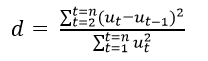

Donde d es aproximadamente igual a:
           
$$d ≈2(1- ρ)$$

y se encuentra definido entre $0 < d < 4$; siendo ρ el coeficiente de autocorrelación muestral de primer orden el cual se encuentra en $-1< ρ < 1$. La prueba contrasta la hipótesis nula (Ho) de inexistencia de autocorrelación contra la hipótesis alternativa (Ha) de existencia de autocorrelación. El contraste se desarrolla a partir de los siguientes criterios:

Si $d = 2$ $(ρ = 0)$ no existe correlación serial en los residuos, si $d = 0$ $(ρ = 1)$ existe correlación serial positiva perfecta y si $d = 4$ $(ρ = -1)$ existe correlación serial negativa perfecta

### 1.5.3 Prueba rango de Bartels

Es una prueba de rango para la aleatoriedad de los datos; esta prueba es la versión de rango de la Prueba de Randomness de Von Neumann (RVN), la cual consiste en una transformación lineal del coeficiente de correlación serial de rango. El estadistico se evalua a traves de la siguientes ecuación:

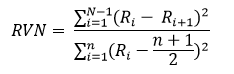

Donde Ri representa el rango (Xi), con i = 1, …n.

### 1.5.4 Resultados de las pruebas

Debido a que la base de datos esta dispuesta de tal forma en la que se ubica un producto por columna y como se habia mencionado anteriormente, el analisis de los datos y el desarrollo de los modelos se realiza de forma individial por producto según el dia, se genera una nueva base de datos la cual se filtra haciendo uso del dia.

In [16]:
# Bucle que filtra la base datos según el dia a la cual se le aplicara las pruebas

dia<-c("Martes", "Jueves", "Viernes")
D<-data.frame(matrix(0, 307, 24))  # nueva base de datos
k<-1
for (j in 3:length(DATA)) {
for (i in 1:3) { 
  D[, k]<- data.frame(DATA[DATA$Dia==dia[i],j])
k<-k+1  
}     
}

# Se Renombra toda la data
names(D)<- c("Yuca Martes", "Yuca Jueves", "Yuca Viernes", "Plátano Martes", "Plátano Jueves", "Plátano Viernes", 
             "Papa Martes", "Papa Jueves", "Papa Viernes", "Piña Martes", "Piña Jueves", "Piña Viernes",
             "Naranja Martes", "Naranja Jueves", "Naranja Viernes", "Mandarina Martes", "Mandarina Jueves",
             "Mandarina Viernes", "Banano Martes", "Banano Jueves", "Banano Viernes", "Tomate Martes", "Tomate Jueves",
             "Tomate Viernes")

In [17]:
# vistazo de la nueva base de datos

head(D[,1:length(D)])

#Se guardan los valores de manera local
write.csv(D, file="DATAporDia.csv")

Yuca Martes,Yuca Jueves,Yuca Viernes,Plátano Martes,Plátano Jueves,Plátano Viernes,Papa Martes,Papa Jueves,Papa Viernes,Piña Martes,...,Naranja Viernes,Mandarina Martes,Mandarina Jueves,Mandarina Viernes,Banano Martes,Banano Jueves,Banano Viernes,Tomate Martes,Tomate Jueves,Tomate Viernes
940,929,893.000,1080,980,1000.000,800,820,810.0000,633,...,660.0000,1576,1707,1696.000,717,917,883.0000,761,682,784.0000
1071,1071,1131.000,1040,1000,1040.000,820,780,750.0000,633,...,620.0000,1970,1739,1630.000,867,833,858.0000,1205,1364,1568.0000
1042,935,997.000,1040,930,1000.000,680,700,633.0000,633,...,620.0000,1783,1714,1690.000,792,833,833.0000,1284,1170,1165.4023
1339,1339,967.000,1157,1083,1170.000,707,713,727.0000,522,...,620.0000,1855,1793,1832.000,733,813,700.0000,1182,943,1034.0000
1265,997,1012.000,1050,1140,1109.000,867,867,833.0000,642,...,647.0000,1739,1957,1739.000,750,750,717.0000,966,864,750.0000
1131,1149,1100.966,1250,1168,1170.724,873,793,844.2989,647,...,624.7414,1884,1812,1703.983,783,783,767.3046,625,659,623.0862


In [18]:
# Matriz donde se generaran los resultados de las pruebas de hipótesis para ser evaluadas posteriormente
result<- as.data.frame(replicate(length(DATA[,1:5]), 0*(1:24)))

for(i in 1:(length(D)))
{
#Prueba de raíz unitaria. Si el p-valor es menor que 0.05 no podemos rechazar 
#la hipótesis nula (para cada caso):
#Se transforman los datos
D[,i]<-as.data.frame.vector(D[,i])

#Se aplican las tres pruebas, con el supuesto de existencia de tendencia y el número de rezagos s seleecionan
# a traves del criterio AIC

df<-ur.df(D[,i],type="trend", lags=0, selectlags = "AIC")
#tendencia, 
result[i,1]<-summary(df)@testreg$coefficients[10] 
#Hipótesis nula, Hay raiz unitaria
result[i,2]<-summary(df)@testreg$coefficients[11] 
#Hipótesis nula, Hay raiz unitaria sin tendencia
result[i,3]<-summary(df)@testreg$coefficients[12] 
#Hipótesis nula, Hay raiz unitaria sin tendencia y sin deriva
    
# Prueba de autocorrelación de Durbin-Watson. A traves del p-valor se determina si acepta o rechaza la hipótesis.
# (si p-valor es manor a 0.05 existe Autocorrelación)
t1<-c(1:307) # conjunto de 307 datos que simulan la linea temporal
aut<-dwtest(D[,i] ~ t1) 
result[i,4]<-aut$p.value

# Prueba de aleatoriedad Bartels. A traves del se determina si acepta o rechaza la hipótesis.
# (si p-valor es manor a 0.05 los datos no son aleatorios)
t2<-c(1:307) # conjunto de 307 datos que simulan la linea temporal
aut2<-bartels.rank.test(D[,i], alternative = "two.sided", pvalue = "normal")
result[i,5]<-aut2$p.value
}

# El formato de los números se modifica para una mejor apreciación y poder realizar calculos con ellos
result<-format(result, scientific=FALSE)
result<-data.matrix(result, rownames.force = NA) # matrix con los p-valores para ejecutar calculos

# Para mejorar la visualziación, se truncan los valores hasta tres decimales
result<-round(result,3)

# Se crea una variable name la cual contine los nombres de los productos
name<-colnames(D[,1:24])

# Se tranforma nuevamente la base de datos
D2<-as.data.frame(result)

# Se renombran las variables a traves de las siguientes lineas de codigo
names(D2)[1]<-paste("Raiz Unitaria (R.U.)")
names(D2)[2]<-paste("R.U. sin tendencia")
names(D2)[3]<-paste("R.U. sin tendencia y sin deriva")
names(D2)[4]<-paste("Prueba de correlaciones")
names(D2)[5]<-paste("Prueba aleatoriedad Von Nueman")

# Se adjuntan los nombres a la tabla 
D2$NOMBRE<-name

# Se imprime la tabla con los valores
D2

Raiz Unitaria (R.U.),R.U. sin tendencia,R.U. sin tendencia y sin deriva,Prueba de correlaciones,Prueba aleatoriedad Von Nueman,NOMBRE
0.000,0.000,0.970,0,0,Yuca Martes
0.001,0.000,0.948,0,0,Yuca Jueves
0.001,0.000,0.946,0,0,Yuca Viernes
0.000,0.000,0.236,0,0,Plátano Martes
0.000,0.000,0.202,0,0,Plátano Jueves
0.000,0.000,0.234,0,0,Plátano Viernes
0.009,0.001,0.487,0,0,Papa Martes
0.021,0.003,0.605,0,0,Papa Jueves
0.023,0.004,0.584,0,0,Papa Viernes
0.000,0.000,0.138,0,0,Piña Martes


#### 1.5.4.1 Resultados pruebas de Raiz Unitaria

In [72]:
# Se imprimen los resultados arrojados por las pruebas de raiz unitaria

print('Productos que presentan comportamiento de raiz unitaria')
print(c("Total de productos:",length(D2[which(D2[,1]<=0.05),6])))
print("Productos:")
D2[which(D2[,1]<=0.05),6]
print("Productos que presentan un comportamiento de raiz unitaria sin tendencia")
print(c("Total de productos:",length(D2[which(D2[,2]<=0.05),6])))
print("Productos:")
D2[which(D2[,2]<=0.05),6]
print("Productos que presentan un comportamiento de raiz unitaria sin tendencia y sin deriva")
print(c("Total de productos:",length(D2[which(D2[,3]<=0.05),6])))
print("Productos:")
D2[which(D2[,3]<=0.05),6]

[1] "Productos que presentan comportamiento de raiz unitaria"
[1] "Total de productos:" "24"                 
[1] "Productos:"


[1] "Yuca Martes"       "Yuca Jueves"       "Yuca Viernes"     
 [4] "Plátano Martes"    "Plátano Jueves"    "Plátano Viernes"  
 [7] "Papa Martes"       "Papa Jueves"       "Papa Viernes"     
[10] "Piña Martes"       "Piña Jueves"       "Piña Viernes"     
[13] "Naranja Martes"    "Naranja Jueves"    "Naranja Viernes"  
[16] "Mandarina Martes"  "Mandarina Jueves"  "Mandarina Viernes"
[19] "Banano Martes"     "Banano Jueves"     "Banano Viernes"   
[22] "Tomate Martes"     "Tomate Jueves"     "Tomate Viernes"

[1] "Productos que presentan un comportamiento de raiz unitaria sin tendencia"
[1] "Total de productos:" "24"                 
[1] "Productos:"


[1] "Yuca Martes"       "Yuca Jueves"       "Yuca Viernes"     
 [4] "Plátano Martes"    "Plátano Jueves"    "Plátano Viernes"  
 [7] "Papa Martes"       "Papa Jueves"       "Papa Viernes"     
[10] "Piña Martes"       "Piña Jueves"       "Piña Viernes"     
[13] "Naranja Martes"    "Naranja Jueves"    "Naranja Viernes"  
[16] "Mandarina Martes"  "Mandarina Jueves"  "Mandarina Viernes"
[19] "Banano Martes"     "Banano Jueves"     "Banano Viernes"   
[22] "Tomate Martes"     "Tomate Jueves"     "Tomate Viernes"

[1] "Productos que presentan un comportamiento de raiz unitaria sin tendencia y sin deriva"
[1] "Total de productos:" "3"                  
[1] "Productos:"


[1] "Banano Martes"  "Banano Jueves"  "Banano Viernes"

#### 1.5.4.2 Resultados prueba Durbin-Watson

In [73]:
# Se imprimen los resultados arrojados por la prueba d

print("Productos que presentan una autocorrelación")
print(c("Total de productos:",length(D2[which(D2[,4]<=0.05),6])))
print("Productos:")
D2[which(D2[,4]<=0.05),6]

[1] "Productos que presentan una autocorrelación"
[1] "Total de productos:" "24"                 
[1] "Productos:"


[1] "Yuca Martes"       "Yuca Jueves"       "Yuca Viernes"     
 [4] "Plátano Martes"    "Plátano Jueves"    "Plátano Viernes"  
 [7] "Papa Martes"       "Papa Jueves"       "Papa Viernes"     
[10] "Piña Martes"       "Piña Jueves"       "Piña Viernes"     
[13] "Naranja Martes"    "Naranja Jueves"    "Naranja Viernes"  
[16] "Mandarina Martes"  "Mandarina Jueves"  "Mandarina Viernes"
[19] "Banano Martes"     "Banano Jueves"     "Banano Viernes"   
[22] "Tomate Martes"     "Tomate Jueves"     "Tomate Viernes"

#### 1.5.4.3 Resultados prueba Bartels

In [74]:
# Se imprimen los resultados arrojados por la prueba de aleatoriedad

print("Estos son los productos que presentan un comportamiento de ruido blanco (H aproximadamente 0.5)")
print(c("Total de productos:",length(D2[which(D2[,5]<=0.05),6])))
print("Nombre de los productos:")
D2[which(D2[,5]<=0.05),6]

[1] "Estos son los productos que presentan un comportamiento de ruido blanco (H aproximadamente 0.5)"
[1] "Total de productos:" "24"                 
[1] "Nombre de los productos:"


[1] "Yuca Martes"       "Yuca Jueves"       "Yuca Viernes"     
 [4] "Plátano Martes"    "Plátano Jueves"    "Plátano Viernes"  
 [7] "Papa Martes"       "Papa Jueves"       "Papa Viernes"     
[10] "Piña Martes"       "Piña Jueves"       "Piña Viernes"     
[13] "Naranja Martes"    "Naranja Jueves"    "Naranja Viernes"  
[16] "Mandarina Martes"  "Mandarina Jueves"  "Mandarina Viernes"
[19] "Banano Martes"     "Banano Jueves"     "Banano Viernes"   
[22] "Tomate Martes"     "Tomate Jueves"     "Tomate Viernes"

### Referencias Bibliográficas

Gómez García, J., Palarea Albaladejo, J., & Martín Fernández, J. A. (2006). Métodos de inferencia estadística con datos faltantes: estudio de simulación sobre los efectos en las estimaciones. Estadística Española, 48(162), 241–270.

Gujarati, D. N., & Porter, D. C. (2010). Econometria. McGraw-Hill.